In [103]:
from __future__ import print_function, division

from keras.layers import Input, Dense, Flatten, Dropout, Reshape
from keras.layers import BatchNormalization, Activation, Conv2D, Conv2DTranspose
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Model
from keras.optimizers import Adam


from keras.datasets import cifar10
import keras.backend as K

import matplotlib.pyplot as plt

import sys
import numpy as np

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [104]:
def get_generator(input_layer):
 
  hid = Dense(128 * 16 * 16, activation='relu')(input_layer)    
  hid = BatchNormalization(momentum=0.9)(hid)
  hid = LeakyReLU(alpha=0.1)(hid)
  hid = Reshape((16, 16, 128))(hid)

  hid = Conv2D(128, kernel_size=5, strides=1,padding='same')(hid)
  hid = BatchNormalization(momentum=0.9)(hid)    
  #hid = Dropout(0.5)(hid)
  hid = LeakyReLU(alpha=0.1)(hid)

  hid = Conv2DTranspose(128, 4, strides=2, padding='same')(hid)
  hid = BatchNormalization(momentum=0.9)(hid)
  hid = LeakyReLU(alpha=0.1)(hid)

  hid = Conv2DTranspose(128, 4, strides=2, padding='same')(hid)
  hid = BatchNormalization(momentum=0.9)(hid)
  hid = LeakyReLU(alpha=0.1)(hid)

  hid = Conv2D(128, kernel_size=5, strides=1, padding='same')(hid)
  hid = BatchNormalization(momentum=0.9)(hid)
  #hid = Dropout(0.5)(hid)
  hid = LeakyReLU(alpha=0.1)(hid)

  hid = Conv2D(128, kernel_size=5, strides=1, padding='same')(hid)
  hid = BatchNormalization(momentum=0.9)(hid)
  hid = LeakyReLU(alpha=0.1)(hid)
                      
  hid = Conv2D(3, kernel_size=5, strides=1, padding="same")(hid)
  out = Activation("tanh")(hid)

  model = Model(input_layer, out)
  model.summary()
  
  return model, out

In [105]:
def get_discriminator(input_layer):

  hid = Conv2D(128, kernel_size=3, strides=1, padding='same')(input_layer)
  hid = BatchNormalization(momentum=0.9)(hid)
  hid = LeakyReLU(alpha=0.1)(hid)

  hid = Conv2D(128, kernel_size=4, strides=2, padding='same')(hid)
  hid = BatchNormalization(momentum=0.9)(hid)
  hid = LeakyReLU(alpha=0.1)(hid)

  hid = Conv2D(128, kernel_size=4, strides=2, padding='same')(hid)
  hid = BatchNormalization(momentum=0.9)(hid)
  hid = LeakyReLU(alpha=0.1)(hid)

  hid = Conv2D(128, kernel_size=4, strides=2, padding='same')(hid)
  hid = BatchNormalization(momentum=0.9)(hid)
  hid = LeakyReLU(alpha=0.1)(hid)

  hid = Flatten()(hid)
  hid = Dropout(0.4)(hid)
  out = Dense(1, activation='sigmoid')(hid)

  model = Model(input_layer, out)

  model.summary()

  return model, out

In [106]:
from keras.preprocessing import image

def generate_noise(n_samples, noise_dim):
  X = np.random.normal(0, 1, size=(n_samples, noise_dim))
  return X

def show_imgs(batchidx):
  noise = generate_noise(9, 100)
  gen_imgs = generator.predict(noise)

  fig, axs = plt.subplots(3, 3)
  count = 0
  for i in range(3):
    for j in range(3):
      img = image.array_to_img(gen_imgs[count], scale=True)
      axs[i,j].imshow(img)
      axs[i,j].axis('off')
      count += 1
  plt.show()
  plt.close()

In [107]:
# GAN creation
img_input = Input(shape=(64,64,3))
discriminator, disc_out = get_discriminator(img_input)
discriminator.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy', metrics=['accuracy'])

discriminator.trainable = False

noise_input = Input(shape=(100,))
generator, gen_out = get_generator(noise_input)

gan_input = Input(shape=(100,))
x = generator(gan_input)
gan_out = discriminator(x)
gan = Model(gan_input, gan_out)
gan.summary()

gan.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 64, 64, 128)       3584      
_________________________________________________________________
batch_normalization_101 (Bat (None, 64, 64, 128)       512       
_________________________________________________________________
leaky_re_lu_101 (LeakyReLU)  (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 32, 32, 128)       262272    
_________________________________________________________________
batch_normalization_102 (Bat (None, 32, 32, 128)       512       
_________________________________________________________________
leaky_re_lu_102 (LeakyReLU)  (None, 32, 32, 128)       0         
__________

In [108]:
import os

In [109]:
# Data
BASE_PATH = "../input/"
print(os.listdir(BASE_PATH))
DATASET_LIST_PATH = BASE_PATH + "100k.txt"

['100k', '100k.txt']


In [75]:
DATASET_LIST_PATH[1]

'.'

In [76]:
INPUT_DATA_DIR = BASE_PATH + "100k/100k/"


In [77]:
INPUT_DATA_DIR[1]

'.'

In [78]:
OUTPUT_DIR = "./"


In [79]:
#MODEL_PATH = BASE_PATH + "models/" + "model_" + str(EPOCH) + ".ckpt"
DATASET = [INPUT_DATA_DIR + str(line).rstrip() for line in open(DATASET_LIST_PATH,"r")]

In [80]:
import scipy.misc
import scipy.ndimage

In [81]:
#uploading images from folder
images = []
for img_name in DATASET:
    image = scipy.ndimage.imread(img_name, mode="RGB")
    image_resized = scipy.misc.imresize(image,(64,64))
    images.append(image_resized)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.


In [82]:
train_x = np.stack(images)

In [83]:
train_x.shape

(100000, 64, 64, 3)

In [84]:
X_train = train_x[:50000]

In [85]:
X_train = ((X_train)-127.5)/127.5

In [86]:
BATCH_SIZE = 320

# Normalize data
 
num_batches = int(X_train.shape[0]/BATCH_SIZE)

In [94]:
X_train.shape

(50000, 64, 64, 3)

/opt/conda/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


  Epoch: 1, Generator Loss: 2.1355565870419526, Discriminator Loss: [0.45244896 0.        ]


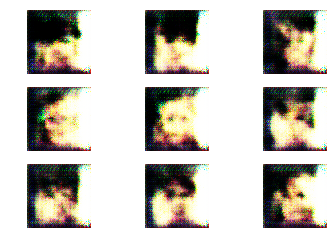

[[0.66406846]
 [0.7274204 ]
 [0.66483825]
 [0.6992504 ]
 [0.64733   ]
 [0.68795276]
 [0.63193065]
 [0.69770527]
 [0.69181746]
 [0.67732817]
 [0.7002827 ]
 [0.69121695]
 [0.68363494]
 [0.70438516]
 [0.71385807]
 [0.6978611 ]
 [0.7054846 ]
 [0.6948976 ]
 [0.7029429 ]
 [0.64545274]
 [0.7261562 ]
 [0.6946658 ]
 [0.65109056]
 [0.74030083]
 [0.72033745]
 [0.68655825]
 [0.7253101 ]
 [0.6799946 ]
 [0.7004536 ]
 [0.70522666]
 [0.67021024]
 [0.65757227]
 [0.6991451 ]
 [0.6829149 ]
 [0.70790553]
 [0.6976715 ]
 [0.64610887]
 [0.6309586 ]
 [0.70560634]
 [0.701609  ]
 [0.7051497 ]
 [0.7340889 ]
 [0.71001816]
 [0.6900981 ]
 [0.65570223]
 [0.63185126]
 [0.6884604 ]
 [0.6895921 ]
 [0.690491  ]
 [0.682969  ]
 [0.68972325]
 [0.6817087 ]
 [0.6964472 ]
 [0.71022236]
 [0.7009291 ]
 [0.68188184]
 [0.6841789 ]
 [0.6935235 ]
 [0.6876062 ]
 [0.6626359 ]
 [0.6675527 ]
 [0.7149204 ]
 [0.7029741 ]
 [0.6940264 ]
 [0.68518406]
 [0.6760045 ]
 [0.69716215]
 [0.66046494]
 [0.6783227 ]
 [0.635267  ]
 [0.66848016]
 [0.68

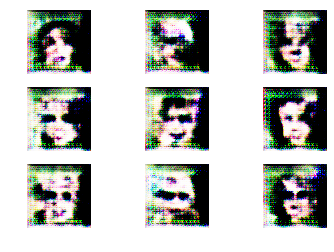

[[0.54327875]
 [0.5355448 ]
 [0.55636007]
 [0.5319742 ]
 [0.52269185]
 [0.52715266]
 [0.52877426]
 [0.5469989 ]
 [0.5270928 ]
 [0.53344893]
 [0.55174243]
 [0.5330492 ]
 [0.53958917]
 [0.5276544 ]
 [0.5638341 ]
 [0.54747325]
 [0.53421986]
 [0.52765995]
 [0.5547379 ]
 [0.54854834]
 [0.5318377 ]
 [0.530123  ]
 [0.54303586]
 [0.5509937 ]
 [0.53235   ]
 [0.52892554]
 [0.54602325]
 [0.54087895]
 [0.52871716]
 [0.53923136]
 [0.5371745 ]
 [0.5367659 ]
 [0.55049425]
 [0.55336803]
 [0.53747874]
 [0.5344059 ]
 [0.53978616]
 [0.54115856]
 [0.5284928 ]
 [0.5373917 ]
 [0.5635787 ]
 [0.5479725 ]
 [0.5427186 ]
 [0.55133235]
 [0.53306717]
 [0.5460431 ]
 [0.54768515]
 [0.5332807 ]
 [0.53707546]
 [0.5488247 ]
 [0.53444433]
 [0.52708775]
 [0.5362428 ]
 [0.54000187]
 [0.5488416 ]
 [0.537913  ]
 [0.54313815]
 [0.5521769 ]
 [0.53491825]
 [0.55042845]
 [0.52441096]
 [0.5532496 ]
 [0.52453816]
 [0.5410376 ]
 [0.53930074]
 [0.52509457]
 [0.5406173 ]
 [0.53738743]
 [0.5407405 ]
 [0.5425201 ]
 [0.53003234]
 [0.54

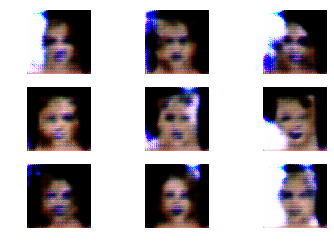

[[0.55172026]
 [0.535884  ]
 [0.58476686]
 [0.58873546]
 [0.5506285 ]
 [0.5459584 ]
 [0.55759126]
 [0.5355427 ]
 [0.5307259 ]
 [0.5438262 ]
 [0.56133187]
 [0.54632235]
 [0.5480808 ]
 [0.55215555]
 [0.54774946]
 [0.552433  ]
 [0.5504948 ]
 [0.5376872 ]
 [0.5458863 ]
 [0.5492641 ]
 [0.5839479 ]
 [0.5534302 ]
 [0.5331345 ]
 [0.5525562 ]
 [0.5659341 ]
 [0.5451491 ]
 [0.5700588 ]
 [0.5554966 ]
 [0.5366086 ]
 [0.53476626]
 [0.5401486 ]
 [0.536928  ]
 [0.5585438 ]
 [0.5459744 ]
 [0.5609583 ]
 [0.5546727 ]
 [0.539938  ]
 [0.55491304]
 [0.54337114]
 [0.57501656]
 [0.5672852 ]
 [0.5399852 ]
 [0.5390613 ]
 [0.5352634 ]
 [0.5598404 ]
 [0.54676   ]
 [0.54140854]
 [0.5383928 ]
 [0.54963726]
 [0.5329891 ]
 [0.5642883 ]
 [0.5325526 ]
 [0.5456532 ]
 [0.54164577]
 [0.54147077]
 [0.5560775 ]
 [0.5859697 ]
 [0.55165625]
 [0.5426076 ]
 [0.5567875 ]
 [0.5533022 ]
 [0.5497601 ]
 [0.5714296 ]
 [0.56744325]
 [0.576171  ]
 [0.55315834]
 [0.57078165]
 [0.56883407]
 [0.5483562 ]
 [0.5600645 ]
 [0.5435916 ]
 [0.53

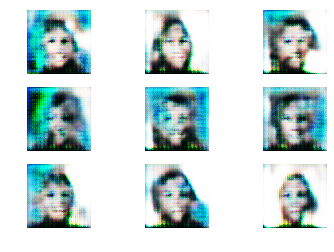

[[0.34052834]
 [0.4485471 ]
 [0.37604636]
 [0.48372167]
 [0.38606074]
 [0.33496255]
 [0.3850336 ]
 [0.50789535]
 [0.36122763]
 [0.25761876]
 [0.39275873]
 [0.46543738]
 [0.4015422 ]
 [0.4112224 ]
 [0.4155688 ]
 [0.3427052 ]
 [0.39550754]
 [0.41345292]
 [0.39633495]
 [0.35367283]
 [0.31592596]
 [0.3527487 ]
 [0.4544871 ]
 [0.36898577]
 [0.3739429 ]
 [0.38567993]
 [0.4674662 ]
 [0.37445363]
 [0.3912944 ]
 [0.39927524]
 [0.3966496 ]
 [0.39770564]
 [0.30523777]
 [0.38829023]
 [0.30063897]
 [0.39443716]
 [0.33841413]
 [0.38274917]
 [0.271079  ]
 [0.3555983 ]
 [0.34440297]
 [0.3780719 ]
 [0.32204878]
 [0.35243735]
 [0.40985134]
 [0.38180578]
 [0.43396297]
 [0.43024862]
 [0.43133414]
 [0.36402452]
 [0.36701512]
 [0.35813272]
 [0.33002597]
 [0.4364367 ]
 [0.45930275]
 [0.46517617]
 [0.38984084]
 [0.40830272]
 [0.4170479 ]
 [0.39934695]
 [0.43416393]
 [0.36734974]
 [0.44345716]
 [0.49970478]
 [0.37899026]
 [0.3025359 ]
 [0.37503847]
 [0.41375455]
 [0.31998378]
 [0.29736835]
 [0.45896202]
 [0.51

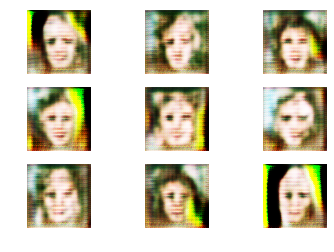

[[0.49701476]
 [0.5078282 ]
 [0.49664772]
 [0.49061507]
 [0.48562682]
 [0.49994636]
 [0.48588306]
 [0.48502505]
 [0.5005947 ]
 [0.49069142]
 [0.46265584]
 [0.48966655]
 [0.49911374]
 [0.47057322]
 [0.47869092]
 [0.5158191 ]
 [0.50511247]
 [0.47215664]
 [0.46493137]
 [0.51108843]
 [0.4881794 ]
 [0.4731009 ]
 [0.48181695]
 [0.47604254]
 [0.47936952]
 [0.498541  ]
 [0.4470906 ]
 [0.48709607]
 [0.5034909 ]
 [0.4997044 ]
 [0.47673208]
 [0.51004684]
 [0.5214337 ]
 [0.4732619 ]
 [0.4886304 ]
 [0.46522176]
 [0.51550835]
 [0.48882017]
 [0.48471355]
 [0.4905945 ]
 [0.47498897]
 [0.47326037]
 [0.5079889 ]
 [0.4784926 ]
 [0.5172009 ]
 [0.49077043]
 [0.5047332 ]
 [0.49152103]
 [0.48278916]
 [0.47851285]
 [0.5042213 ]
 [0.48680735]
 [0.48910674]
 [0.4719745 ]
 [0.46072114]
 [0.5109996 ]
 [0.46834856]
 [0.4910924 ]
 [0.50938106]
 [0.48783356]
 [0.49183932]
 [0.49692035]
 [0.52761203]
 [0.4768621 ]
 [0.47259915]
 [0.5035401 ]
 [0.48371956]
 [0.46488714]
 [0.48459178]
 [0.46507907]
 [0.4818838 ]
 [0.48

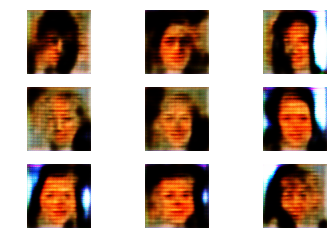

[[0.20928004]
 [0.20239192]
 [0.32027173]
 [0.23012638]
 [0.2771535 ]
 [0.27863842]
 [0.2665153 ]
 [0.25366047]
 [0.2409864 ]
 [0.23770496]
 [0.2845897 ]
 [0.17377001]
 [0.26811665]
 [0.22556856]
 [0.28315744]
 [0.23310688]
 [0.2215164 ]
 [0.22949618]
 [0.30088365]
 [0.26693714]
 [0.3321715 ]
 [0.2940879 ]
 [0.23827273]
 [0.23589349]
 [0.22110087]
 [0.2412248 ]
 [0.2483325 ]
 [0.32233107]
 [0.32689676]
 [0.2118454 ]
 [0.27165568]
 [0.2489286 ]
 [0.19270909]
 [0.27079332]
 [0.28354633]
 [0.33015984]
 [0.23443356]
 [0.19733447]
 [0.22692272]
 [0.28914356]
 [0.19691691]
 [0.2335051 ]
 [0.23734492]
 [0.21645683]
 [0.20307472]
 [0.2549675 ]
 [0.29976997]
 [0.22858122]
 [0.32585204]
 [0.25396472]
 [0.23679107]
 [0.25412375]
 [0.25287303]
 [0.22944984]
 [0.25251192]
 [0.18525901]
 [0.19166842]
 [0.29920173]
 [0.24132755]
 [0.32139546]
 [0.20028517]
 [0.3208769 ]
 [0.2074343 ]
 [0.30672556]
 [0.20502189]
 [0.30499002]
 [0.21013606]
 [0.21940732]
 [0.20695594]
 [0.24494138]
 [0.27939838]
 [0.25

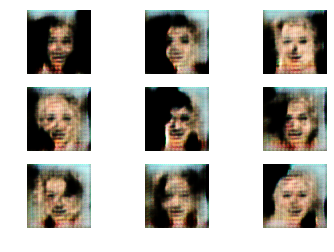

[[0.45665976]
 [0.45313156]
 [0.44724855]
 [0.4621624 ]
 [0.47829232]
 [0.45678785]
 [0.44920748]
 [0.4586533 ]
 [0.48019496]
 [0.4603717 ]
 [0.476769  ]
 [0.48664498]
 [0.46508265]
 [0.485625  ]
 [0.46222553]
 [0.46235147]
 [0.46733016]
 [0.47163102]
 [0.48206753]
 [0.46969193]
 [0.43183452]
 [0.47613877]
 [0.47126922]
 [0.47209018]
 [0.47904828]
 [0.4657148 ]
 [0.45119435]
 [0.47459596]
 [0.48260325]
 [0.47822514]
 [0.47232613]
 [0.46636233]
 [0.4613311 ]
 [0.46950752]
 [0.46354827]
 [0.5101557 ]
 [0.46360573]
 [0.4791447 ]
 [0.47683367]
 [0.4420526 ]
 [0.4525682 ]
 [0.44521633]
 [0.48307624]
 [0.45782936]
 [0.45172983]
 [0.45407093]
 [0.45720422]
 [0.47742108]
 [0.48710707]
 [0.46860757]
 [0.47307628]
 [0.45890433]
 [0.46251187]
 [0.4570308 ]
 [0.4790507 ]
 [0.4664841 ]
 [0.45812705]
 [0.4766717 ]
 [0.49048942]
 [0.46161038]
 [0.47909933]
 [0.44554588]
 [0.4589601 ]
 [0.48565918]
 [0.4679404 ]
 [0.45660302]
 [0.47989124]
 [0.47391206]
 [0.46621117]
 [0.4640065 ]
 [0.47507012]
 [0.47

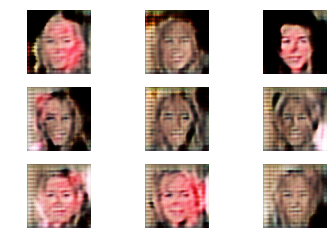

[[0.4934863 ]
 [0.53730774]
 [0.5089334 ]
 [0.49446738]
 [0.4964315 ]
 [0.5308212 ]
 [0.5059493 ]
 [0.4984216 ]
 [0.50221926]
 [0.494151  ]
 [0.50583893]
 [0.5290549 ]
 [0.52169925]
 [0.5023694 ]
 [0.50133336]
 [0.5003818 ]
 [0.5048982 ]
 [0.42897394]
 [0.52859926]
 [0.4442512 ]
 [0.51763755]
 [0.5424591 ]
 [0.5119533 ]
 [0.4975503 ]
 [0.5144291 ]
 [0.49361423]
 [0.5059188 ]
 [0.4765688 ]
 [0.49405804]
 [0.509794  ]
 [0.5244807 ]
 [0.5130059 ]
 [0.47632143]
 [0.4476294 ]
 [0.48937652]
 [0.49788296]
 [0.46035284]
 [0.50750023]
 [0.5207853 ]
 [0.48883593]
 [0.44358242]
 [0.52137476]
 [0.5111591 ]
 [0.5230116 ]
 [0.48601145]
 [0.5260802 ]
 [0.5102816 ]
 [0.48753038]
 [0.51791334]
 [0.5159516 ]
 [0.52336884]
 [0.49158445]
 [0.52791697]
 [0.5386845 ]
 [0.44592217]
 [0.52053434]
 [0.48633498]
 [0.5109919 ]
 [0.5128134 ]
 [0.46635392]
 [0.48043674]
 [0.49453855]
 [0.4871517 ]
 [0.4925421 ]
 [0.50460976]
 [0.52602696]
 [0.5130203 ]
 [0.49383354]
 [0.50499576]
 [0.49678406]
 [0.4924503 ]
 [0.48

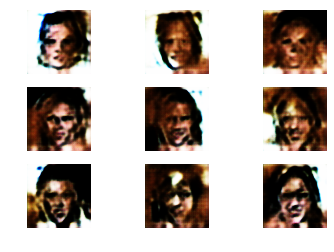

[[0.60100496]
 [0.5840221 ]
 [0.5449203 ]
 [0.54028654]
 [0.5349817 ]
 [0.57447404]
 [0.57183677]
 [0.5814669 ]
 [0.5643948 ]
 [0.5718445 ]
 [0.57610214]
 [0.58493024]
 [0.5689088 ]
 [0.5850915 ]
 [0.56675977]
 [0.56554425]
 [0.57253367]
 [0.5726897 ]
 [0.5476717 ]
 [0.55644447]
 [0.5754247 ]
 [0.55245703]
 [0.5909118 ]
 [0.55543536]
 [0.59825474]
 [0.55281425]
 [0.59579825]
 [0.5828687 ]
 [0.5687826 ]
 [0.5801256 ]
 [0.5548399 ]
 [0.56622314]
 [0.568611  ]
 [0.588066  ]
 [0.5498702 ]
 [0.58947533]
 [0.5699418 ]
 [0.5486107 ]
 [0.5670605 ]
 [0.570004  ]
 [0.57874125]
 [0.57113886]
 [0.5439753 ]
 [0.5723843 ]
 [0.60775137]
 [0.56181663]
 [0.5883411 ]
 [0.5606025 ]
 [0.5628218 ]
 [0.5581432 ]
 [0.5426617 ]
 [0.58344144]
 [0.5834294 ]
 [0.5610626 ]
 [0.55630296]
 [0.56065696]
 [0.60921144]
 [0.5767288 ]
 [0.59208995]
 [0.57972735]
 [0.588102  ]
 [0.5734647 ]
 [0.5645288 ]
 [0.58054   ]
 [0.58588266]
 [0.55609   ]
 [0.57313174]
 [0.58233637]
 [0.5499426 ]
 [0.56086683]
 [0.57396007]
 [0.58

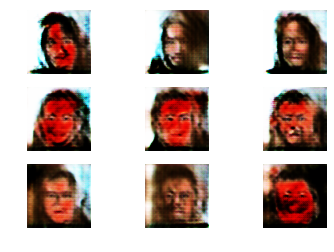

[[0.4598093 ]
 [0.28856438]
 [0.41942927]
 [0.4452286 ]
 [0.3475774 ]
 [0.51821357]
 [0.4501207 ]
 [0.38581014]
 [0.4486119 ]
 [0.39776635]
 [0.3840817 ]
 [0.4193882 ]
 [0.33295554]
 [0.42174956]
 [0.4369149 ]
 [0.40769136]
 [0.28567585]
 [0.39239135]
 [0.31465697]
 [0.38701415]
 [0.4346775 ]
 [0.37979686]
 [0.2778166 ]
 [0.43764132]
 [0.43177465]
 [0.400599  ]
 [0.44871452]
 [0.2894277 ]
 [0.46728423]
 [0.38103437]
 [0.41959256]
 [0.42298377]
 [0.3583458 ]
 [0.44023246]
 [0.43911386]
 [0.40120542]
 [0.43322104]
 [0.38746718]
 [0.41596365]
 [0.31005386]
 [0.45934504]
 [0.45646852]
 [0.34618655]
 [0.40614933]
 [0.45112583]
 [0.44892225]
 [0.28512263]
 [0.50950664]
 [0.4261024 ]
 [0.40325445]
 [0.39999542]
 [0.44733545]
 [0.34815395]
 [0.40803218]
 [0.3827309 ]
 [0.40273508]
 [0.3738649 ]
 [0.44436392]
 [0.47722712]
 [0.37423372]
 [0.35081428]
 [0.41497755]
 [0.34243524]
 [0.46653342]
 [0.36507767]
 [0.443386  ]
 [0.3513594 ]
 [0.43749908]
 [0.30843392]
 [0.38983572]
 [0.37678835]
 [0.33

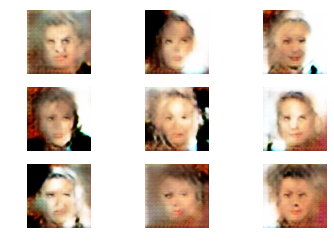

[[0.34338135]
 [0.4197597 ]
 [0.42226183]
 [0.3408026 ]
 [0.4243178 ]
 [0.43889058]
 [0.4309088 ]
 [0.39183468]
 [0.3692707 ]
 [0.37792444]
 [0.37402388]
 [0.3956027 ]
 [0.42626378]
 [0.4112147 ]
 [0.38649932]
 [0.37925854]
 [0.41429374]
 [0.42975944]
 [0.36722147]
 [0.4275406 ]
 [0.3973086 ]
 [0.38760096]
 [0.37526456]
 [0.43633422]
 [0.35374314]
 [0.3648071 ]
 [0.38513374]
 [0.43813732]
 [0.41045105]
 [0.40750667]
 [0.41534713]
 [0.40651953]
 [0.41447654]
 [0.41159976]
 [0.44847542]
 [0.43269026]
 [0.38186008]
 [0.4166972 ]
 [0.3698262 ]
 [0.36472166]
 [0.41239107]
 [0.37041718]
 [0.41790724]
 [0.42236766]
 [0.33989418]
 [0.4583882 ]
 [0.4116328 ]
 [0.4349524 ]
 [0.38969117]
 [0.40962625]
 [0.42935023]
 [0.39476523]
 [0.42612895]
 [0.367135  ]
 [0.388472  ]
 [0.29046303]
 [0.4449726 ]
 [0.42075807]
 [0.35659167]
 [0.39879513]
 [0.4175348 ]
 [0.48756033]
 [0.3659381 ]
 [0.41192222]
 [0.44870624]
 [0.39220762]
 [0.38957638]
 [0.37994915]
 [0.33400375]
 [0.47004095]
 [0.44950637]
 [0.41

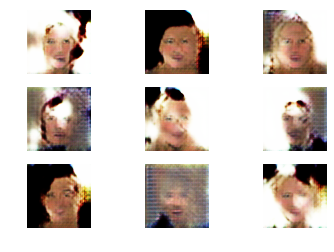

[[0.50536025]
 [0.5368129 ]
 [0.5204734 ]
 [0.50735795]
 [0.524111  ]
 [0.5246473 ]
 [0.52568483]
 [0.4987328 ]
 [0.5176085 ]
 [0.50536215]
 [0.5334295 ]
 [0.5541176 ]
 [0.51628613]
 [0.5393863 ]
 [0.50494945]
 [0.50248903]
 [0.5313602 ]
 [0.529946  ]
 [0.52534175]
 [0.5107739 ]
 [0.5054266 ]
 [0.50890285]
 [0.50154674]
 [0.49868944]
 [0.5136955 ]
 [0.51704085]
 [0.5273417 ]
 [0.51815706]
 [0.5007581 ]
 [0.531494  ]
 [0.51911694]
 [0.49597248]
 [0.52232414]
 [0.5297998 ]
 [0.5210505 ]
 [0.53238785]
 [0.48408046]
 [0.5279613 ]
 [0.50588506]
 [0.5406199 ]
 [0.5314717 ]
 [0.51639444]
 [0.5086664 ]
 [0.5374459 ]
 [0.51163226]
 [0.5023613 ]
 [0.5204289 ]
 [0.5170079 ]
 [0.49415457]
 [0.5401912 ]
 [0.55848634]
 [0.544749  ]
 [0.5463621 ]
 [0.5224525 ]
 [0.5183095 ]
 [0.49533415]
 [0.51468796]
 [0.5125822 ]
 [0.48186463]
 [0.50613254]
 [0.50592345]
 [0.5589616 ]
 [0.48344663]
 [0.5383281 ]
 [0.5041575 ]
 [0.5287098 ]
 [0.49989167]
 [0.47117075]
 [0.53016174]
 [0.5085101 ]
 [0.5400241 ]
 [0.51

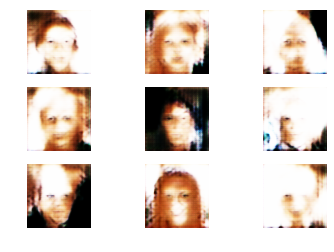

[[0.47983956]
 [0.37297654]
 [0.48825654]
 [0.56846154]
 [0.5552057 ]
 [0.4146356 ]
 [0.4414675 ]
 [0.422902  ]
 [0.34275007]
 [0.5585658 ]
 [0.6095109 ]
 [0.40632576]
 [0.4601108 ]
 [0.60577273]
 [0.43696404]
 [0.40753886]
 [0.53552574]
 [0.42343187]
 [0.49253798]
 [0.53428686]
 [0.4890479 ]
 [0.5071988 ]
 [0.49957955]
 [0.35853285]
 [0.4680791 ]
 [0.37533376]
 [0.54465306]
 [0.3452081 ]
 [0.5077193 ]
 [0.43833265]
 [0.48533452]
 [0.43596134]
 [0.45123786]
 [0.5764542 ]
 [0.55241966]
 [0.36054036]
 [0.48143917]
 [0.6003254 ]
 [0.5171379 ]
 [0.5002408 ]
 [0.47288746]
 [0.4910531 ]
 [0.58566254]
 [0.4047555 ]
 [0.6378478 ]
 [0.43616456]
 [0.6299358 ]
 [0.52828413]
 [0.36418596]
 [0.44998416]
 [0.4102193 ]
 [0.41376412]
 [0.5781783 ]
 [0.43422574]
 [0.3783459 ]
 [0.40430772]
 [0.5591364 ]
 [0.3328898 ]
 [0.39337045]
 [0.48789418]
 [0.4607696 ]
 [0.553954  ]
 [0.5092287 ]
 [0.56866306]
 [0.45996362]
 [0.521805  ]
 [0.4486516 ]
 [0.46067274]
 [0.39054567]
 [0.48755988]
 [0.55352825]
 [0.52

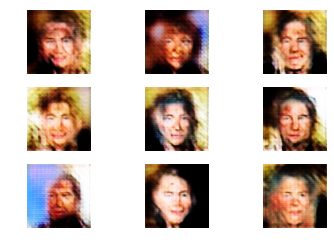

[[0.43035236]
 [0.47449973]
 [0.42621866]
 [0.44750348]
 [0.39431614]
 [0.41300523]
 [0.45150512]
 [0.43400338]
 [0.4227937 ]
 [0.4365973 ]
 [0.48635894]
 [0.42293507]
 [0.3982575 ]
 [0.4114993 ]
 [0.43460706]
 [0.43650648]
 [0.36189818]
 [0.4398157 ]
 [0.48595467]
 [0.37514225]
 [0.43607575]
 [0.42540538]
 [0.4872127 ]
 [0.4370652 ]
 [0.4717244 ]
 [0.3663941 ]
 [0.46803018]
 [0.49849612]
 [0.43923885]
 [0.4590439 ]
 [0.40699798]
 [0.4139638 ]
 [0.48453307]
 [0.42393714]
 [0.42535815]
 [0.4701643 ]
 [0.45835963]
 [0.40135726]
 [0.42888162]
 [0.44093814]
 [0.43099275]
 [0.3943684 ]
 [0.4555483 ]
 [0.41202453]
 [0.43841618]
 [0.4508606 ]
 [0.44639504]
 [0.4385505 ]
 [0.42058536]
 [0.41551638]
 [0.5102846 ]
 [0.37393317]
 [0.4320712 ]
 [0.41462335]
 [0.42816246]
 [0.4920991 ]
 [0.41713977]
 [0.40970647]
 [0.4217447 ]
 [0.44638604]
 [0.4546096 ]
 [0.3923596 ]
 [0.4112404 ]
 [0.39961928]
 [0.43720084]
 [0.44091898]
 [0.47899386]
 [0.46675307]
 [0.45055413]
 [0.4081473 ]
 [0.4834028 ]
 [0.46

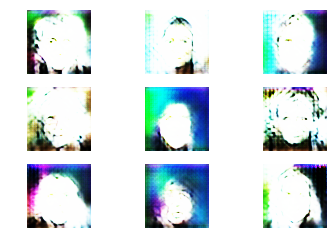

[[0.27330336]
 [0.21598956]
 [0.22642824]
 [0.3278201 ]
 [0.25013384]
 [0.27014092]
 [0.20328414]
 [0.30044845]
 [0.28488764]
 [0.19613817]
 [0.2273972 ]
 [0.27763388]
 [0.28039366]
 [0.23356974]
 [0.24115473]
 [0.24073577]
 [0.32407385]
 [0.24820441]
 [0.23878223]
 [0.29858017]
 [0.3263159 ]
 [0.26122224]
 [0.27187854]
 [0.27913094]
 [0.25865346]
 [0.22544914]
 [0.34111065]
 [0.26614845]
 [0.25309896]
 [0.29745722]
 [0.26373488]
 [0.21456164]
 [0.21487391]
 [0.37997115]
 [0.21749577]
 [0.36371505]
 [0.34382147]
 [0.23802415]
 [0.25466985]
 [0.25845617]
 [0.2863985 ]
 [0.2146528 ]
 [0.2556758 ]
 [0.27544776]
 [0.26444268]
 [0.27134025]
 [0.3205067 ]
 [0.27427644]
 [0.333991  ]
 [0.22073987]
 [0.25832564]
 [0.24836725]
 [0.2696699 ]
 [0.29415154]
 [0.29842883]
 [0.30355883]
 [0.3816671 ]
 [0.36131513]
 [0.20913011]
 [0.32524455]
 [0.33695704]
 [0.24745044]
 [0.33134288]
 [0.27897632]
 [0.2956179 ]
 [0.26175886]
 [0.36498925]
 [0.22712734]
 [0.22496036]
 [0.31543154]
 [0.24679163]
 [0.28

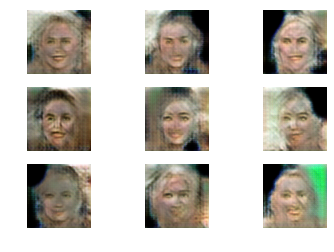

[[0.52260447]
 [0.51439303]
 [0.52124083]
 [0.5114487 ]
 [0.5008741 ]
 [0.50351465]
 [0.49969307]
 [0.5169432 ]
 [0.53598374]
 [0.5016239 ]
 [0.4886449 ]
 [0.49151286]
 [0.48046896]
 [0.5002411 ]
 [0.4864185 ]
 [0.5198577 ]
 [0.5382225 ]
 [0.5004703 ]
 [0.505804  ]
 [0.5162248 ]
 [0.506837  ]
 [0.5539175 ]
 [0.5129724 ]
 [0.5253808 ]
 [0.48388976]
 [0.4836356 ]
 [0.5341665 ]
 [0.49699956]
 [0.50880957]
 [0.5023567 ]
 [0.48841903]
 [0.5095058 ]
 [0.50317925]
 [0.5651311 ]
 [0.49756166]
 [0.5252063 ]
 [0.5001598 ]
 [0.47413632]
 [0.5196032 ]
 [0.48925206]
 [0.48206818]
 [0.52162516]
 [0.5249941 ]
 [0.5100654 ]
 [0.5331552 ]
 [0.49226436]
 [0.47301415]
 [0.44360143]
 [0.506401  ]
 [0.5076964 ]
 [0.5153709 ]
 [0.4905021 ]
 [0.5372935 ]
 [0.5163159 ]
 [0.49166542]
 [0.509254  ]
 [0.51117975]
 [0.5324791 ]
 [0.5144856 ]
 [0.49825054]
 [0.49069187]
 [0.4770856 ]
 [0.5158308 ]
 [0.50269866]
 [0.54210293]
 [0.53387094]
 [0.53286827]
 [0.5217199 ]
 [0.5158114 ]
 [0.48451155]
 [0.5361859 ]
 [0.51

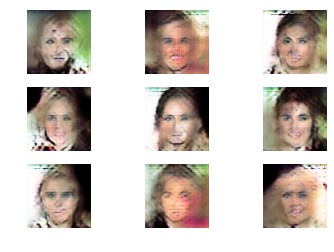

[[0.48487923]
 [0.4787752 ]
 [0.46447504]
 [0.4461426 ]
 [0.49807033]
 [0.51570857]
 [0.44069397]
 [0.42264858]
 [0.5985635 ]
 [0.45201808]
 [0.51331896]
 [0.5567403 ]
 [0.5273731 ]
 [0.47258198]
 [0.55147535]
 [0.43224832]
 [0.40009913]
 [0.50709397]
 [0.50758815]
 [0.51985884]
 [0.5293869 ]
 [0.49159604]
 [0.5100923 ]
 [0.6079451 ]
 [0.48757967]
 [0.5096283 ]
 [0.5057515 ]
 [0.5170306 ]
 [0.49569395]
 [0.45565748]
 [0.5299639 ]
 [0.5143595 ]
 [0.52597296]
 [0.54703236]
 [0.4729529 ]
 [0.57639545]
 [0.5396931 ]
 [0.43342698]
 [0.47712988]
 [0.50338924]
 [0.6154604 ]
 [0.42481273]
 [0.5203633 ]
 [0.51502824]
 [0.540342  ]
 [0.5733629 ]
 [0.52233106]
 [0.505387  ]
 [0.47904858]
 [0.43730617]
 [0.4800945 ]
 [0.45568934]
 [0.5353158 ]
 [0.42274484]
 [0.48105603]
 [0.51686454]
 [0.5666043 ]
 [0.44660446]
 [0.44513792]
 [0.45620304]
 [0.5782972 ]
 [0.5228522 ]
 [0.5047709 ]
 [0.46576738]
 [0.5559726 ]
 [0.4827701 ]
 [0.49955925]
 [0.50289905]
 [0.49837026]
 [0.48556608]
 [0.55401725]
 [0.55

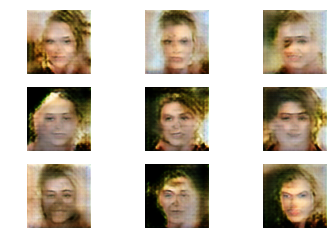

[[0.563459  ]
 [0.58929646]
 [0.44680676]
 [0.53936595]
 [0.62030286]
 [0.43283314]
 [0.484744  ]
 [0.6003711 ]
 [0.542177  ]
 [0.45923507]
 [0.46631837]
 [0.49616712]
 [0.54196215]
 [0.5219126 ]
 [0.52055526]
 [0.5966444 ]
 [0.5392524 ]
 [0.569806  ]
 [0.51868606]
 [0.5861372 ]
 [0.57274437]
 [0.4605093 ]
 [0.5533666 ]
 [0.4922788 ]
 [0.51320386]
 [0.5206813 ]
 [0.51855713]
 [0.55873877]
 [0.45619857]
 [0.56143945]
 [0.544984  ]
 [0.39949602]
 [0.5110113 ]
 [0.4778699 ]
 [0.56697214]
 [0.5173411 ]
 [0.4700694 ]
 [0.4955287 ]
 [0.55868447]
 [0.57581943]
 [0.5538957 ]
 [0.53307474]
 [0.5045113 ]
 [0.49492672]
 [0.43473095]
 [0.52774936]
 [0.40097648]
 [0.5407123 ]
 [0.48920968]
 [0.58030623]
 [0.55209166]
 [0.46640095]
 [0.44259423]
 [0.60835034]
 [0.50907046]
 [0.40599078]
 [0.47295398]
 [0.44132316]
 [0.5143459 ]
 [0.52102757]
 [0.47617632]
 [0.5001152 ]
 [0.4059636 ]
 [0.5745209 ]
 [0.5572102 ]
 [0.517188  ]
 [0.5712421 ]
 [0.49259737]
 [0.5502373 ]
 [0.48786107]
 [0.5063285 ]
 [0.58

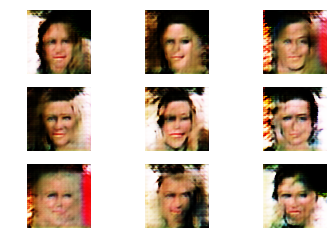

[[0.47994807]
 [0.30164945]
 [0.35414192]
 [0.37163156]
 [0.5156667 ]
 [0.35452658]
 [0.56472826]
 [0.4170353 ]
 [0.40698308]
 [0.5372324 ]
 [0.4619503 ]
 [0.37918308]
 [0.27606362]
 [0.3959566 ]
 [0.3905954 ]
 [0.53134054]
 [0.43683624]
 [0.33304542]
 [0.50373   ]
 [0.39525795]
 [0.34657392]
 [0.34086752]
 [0.40769154]
 [0.457119  ]
 [0.47979033]
 [0.48819596]
 [0.29266125]
 [0.3858223 ]
 [0.36510885]
 [0.45537513]
 [0.43114397]
 [0.5082677 ]
 [0.40211242]
 [0.45684025]
 [0.33687836]
 [0.39921343]
 [0.35307097]
 [0.45655185]
 [0.47718444]
 [0.4700196 ]
 [0.32040983]
 [0.32595024]
 [0.29789108]
 [0.3769591 ]
 [0.59377944]
 [0.43688393]
 [0.5685184 ]
 [0.41667747]
 [0.32507753]
 [0.43359086]
 [0.44983682]
 [0.43094462]
 [0.40460724]
 [0.47439855]
 [0.45637792]
 [0.41210783]
 [0.3276693 ]
 [0.3009651 ]
 [0.4145478 ]
 [0.38718063]
 [0.452963  ]
 [0.47703376]
 [0.326362  ]
 [0.42864043]
 [0.26612127]
 [0.44779104]
 [0.30643874]
 [0.44700304]
 [0.4919619 ]
 [0.40037388]
 [0.5378333 ]
 [0.32

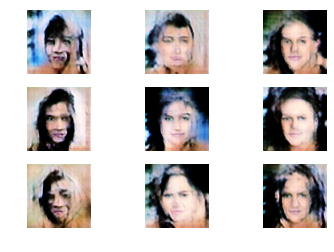

[[0.59513825]
 [0.4996548 ]
 [0.5592641 ]
 [0.5700838 ]
 [0.59408844]
 [0.5722213 ]
 [0.5008136 ]
 [0.55945975]
 [0.5865389 ]
 [0.53578055]
 [0.45639881]
 [0.6327289 ]
 [0.61310834]
 [0.49349213]
 [0.5972076 ]
 [0.61166805]
 [0.44786674]
 [0.48840842]
 [0.60956746]
 [0.5594621 ]
 [0.5024122 ]
 [0.5083208 ]
 [0.5363621 ]
 [0.5163641 ]
 [0.4850366 ]
 [0.60901827]
 [0.5238243 ]
 [0.5257434 ]
 [0.5670287 ]
 [0.58176017]
 [0.4657737 ]
 [0.482845  ]
 [0.45218807]
 [0.5503044 ]
 [0.540876  ]
 [0.58298624]
 [0.5665605 ]
 [0.5185017 ]
 [0.5649123 ]
 [0.5914094 ]
 [0.58203053]
 [0.5749268 ]
 [0.60532755]
 [0.54750353]
 [0.5569996 ]
 [0.6123253 ]
 [0.5169909 ]
 [0.4924022 ]
 [0.5575449 ]
 [0.63971764]
 [0.6137594 ]
 [0.5646248 ]
 [0.5772569 ]
 [0.48869118]
 [0.50440514]
 [0.5973892 ]
 [0.5547133 ]
 [0.5704768 ]
 [0.5735965 ]
 [0.56320816]
 [0.6390656 ]
 [0.61762846]
 [0.5723393 ]
 [0.58872896]
 [0.5138581 ]
 [0.49687886]
 [0.57482404]
 [0.52754027]
 [0.59246016]
 [0.56600964]
 [0.48594737]
 [0.56

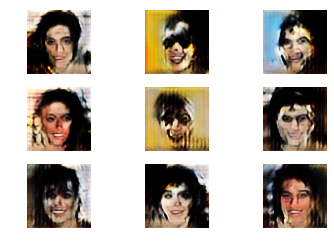

[[0.41363364]
 [0.45401686]
 [0.37211034]
 [0.36323428]
 [0.4647692 ]
 [0.3569829 ]
 [0.5235988 ]
 [0.38824618]
 [0.33895314]
 [0.3392816 ]
 [0.3589722 ]
 [0.3850689 ]
 [0.3665483 ]
 [0.393403  ]
 [0.3764174 ]
 [0.42666578]
 [0.45917726]
 [0.3034913 ]
 [0.30558193]
 [0.3837635 ]
 [0.50005573]
 [0.47005117]
 [0.43954918]
 [0.32505244]
 [0.47045004]
 [0.3159786 ]
 [0.47167742]
 [0.42799917]
 [0.42269003]
 [0.4743661 ]
 [0.3761166 ]
 [0.42307982]
 [0.4460957 ]
 [0.4295255 ]
 [0.3432824 ]
 [0.43370336]
 [0.5372526 ]
 [0.4576037 ]
 [0.439286  ]
 [0.45009518]
 [0.4332229 ]
 [0.43967414]
 [0.5993571 ]
 [0.50190747]
 [0.3218739 ]
 [0.46681738]
 [0.4041499 ]
 [0.36864495]
 [0.38671723]
 [0.4161501 ]
 [0.34286025]
 [0.435388  ]
 [0.37096328]
 [0.30508512]
 [0.40953887]
 [0.5376826 ]
 [0.41148746]
 [0.3807938 ]
 [0.42514893]
 [0.33578512]
 [0.40822393]
 [0.2979545 ]
 [0.32596457]
 [0.3588187 ]
 [0.27995193]
 [0.4504318 ]
 [0.33135745]
 [0.5118702 ]
 [0.39269882]
 [0.4125073 ]
 [0.56155455]
 [0.57

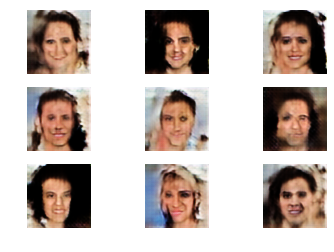

[[0.37355375]
 [0.62145483]
 [0.48385307]
 [0.4799968 ]
 [0.49616235]
 [0.54985625]
 [0.6198566 ]
 [0.52773046]
 [0.48924345]
 [0.5535836 ]
 [0.50562567]
 [0.51883703]
 [0.47067353]
 [0.44332987]
 [0.57357967]
 [0.53848094]
 [0.5398765 ]
 [0.49110788]
 [0.3858339 ]
 [0.5684442 ]
 [0.4599754 ]
 [0.4885266 ]
 [0.43522424]
 [0.48273352]
 [0.42488074]
 [0.5479965 ]
 [0.4963359 ]
 [0.4963504 ]
 [0.40534413]
 [0.5448836 ]
 [0.48244348]
 [0.4711531 ]
 [0.49568895]
 [0.44197112]
 [0.46061787]
 [0.5186191 ]
 [0.49798706]
 [0.5187287 ]
 [0.4284786 ]
 [0.5169848 ]
 [0.5348439 ]
 [0.5049022 ]
 [0.5515623 ]
 [0.4366722 ]
 [0.51546806]
 [0.5258363 ]
 [0.59200686]
 [0.5377641 ]
 [0.45274958]
 [0.53299075]
 [0.43220818]
 [0.3850374 ]
 [0.3936865 ]
 [0.49500164]
 [0.44580945]
 [0.4584586 ]
 [0.48142242]
 [0.46697152]
 [0.5005137 ]
 [0.5831872 ]
 [0.57370555]
 [0.5260127 ]
 [0.47723043]
 [0.49659148]
 [0.5888427 ]
 [0.5168394 ]
 [0.47923055]
 [0.45038673]
 [0.5166137 ]
 [0.4225585 ]
 [0.46977696]
 [0.50

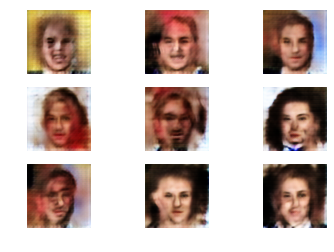

[[0.50652665]
 [0.54484946]
 [0.4675157 ]
 [0.42466685]
 [0.55504584]
 [0.46191514]
 [0.4611591 ]
 [0.4149168 ]
 [0.5313008 ]
 [0.53490895]
 [0.49214414]
 [0.5453314 ]
 [0.5348404 ]
 [0.59129363]
 [0.45913827]
 [0.44371727]
 [0.44039038]
 [0.46749172]
 [0.5370904 ]
 [0.5230601 ]
 [0.48030606]
 [0.5049272 ]
 [0.54027337]
 [0.5475855 ]
 [0.4341137 ]
 [0.4582693 ]
 [0.5821397 ]
 [0.48237517]
 [0.47598344]
 [0.5587067 ]
 [0.45803028]
 [0.5001167 ]
 [0.3932945 ]
 [0.43154633]
 [0.48508754]
 [0.53950465]
 [0.50996614]
 [0.51668954]
 [0.45437554]
 [0.4407076 ]
 [0.5083658 ]
 [0.46144646]
 [0.54400855]
 [0.49452692]
 [0.4760123 ]
 [0.52808684]
 [0.5946629 ]
 [0.5371509 ]
 [0.54627633]
 [0.56686455]
 [0.5573761 ]
 [0.57431597]
 [0.587831  ]
 [0.4515211 ]
 [0.50296557]
 [0.49727032]
 [0.4657785 ]
 [0.5044866 ]
 [0.56453145]
 [0.49732798]
 [0.41554183]
 [0.52712363]
 [0.498956  ]
 [0.54404193]
 [0.6476676 ]
 [0.48563176]
 [0.4660709 ]
 [0.5331414 ]
 [0.59637654]
 [0.549116  ]
 [0.5736678 ]
 [0.50

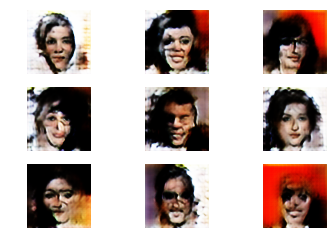

[[0.42063704]
 [0.48765218]
 [0.3019976 ]
 [0.48067784]
 [0.41310835]
 [0.49063838]
 [0.41537657]
 [0.19712818]
 [0.29103437]
 [0.4421679 ]
 [0.16631913]
 [0.3159464 ]
 [0.3675037 ]
 [0.47487828]
 [0.25503895]
 [0.3837442 ]
 [0.29420683]
 [0.16941506]
 [0.39257762]
 [0.29426035]
 [0.40809473]
 [0.23147622]
 [0.29741007]
 [0.41549197]
 [0.5859033 ]
 [0.21668583]
 [0.37070185]
 [0.3928772 ]
 [0.36320364]
 [0.57200134]
 [0.23919499]
 [0.3548339 ]
 [0.14463565]
 [0.39557087]
 [0.19503301]
 [0.34155053]
 [0.22512057]
 [0.28436756]
 [0.3154223 ]
 [0.4750341 ]
 [0.3510139 ]
 [0.22971115]
 [0.35894817]
 [0.45742586]
 [0.3338343 ]
 [0.49425077]
 [0.57133347]
 [0.32386398]
 [0.24168837]
 [0.4757033 ]
 [0.24130967]
 [0.37382865]
 [0.6320528 ]
 [0.15220997]
 [0.4112442 ]
 [0.3622321 ]
 [0.39427605]
 [0.1951037 ]
 [0.44140044]
 [0.53074485]
 [0.31771356]
 [0.33024544]
 [0.14506707]
 [0.37836528]
 [0.12933597]
 [0.4446119 ]
 [0.311989  ]
 [0.28832474]
 [0.14480409]
 [0.60766804]
 [0.41639432]
 [0.12

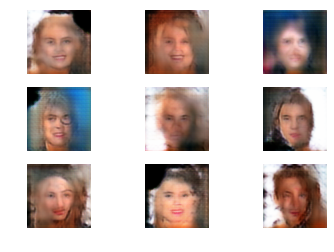

[[0.5009364 ]
 [0.44876152]
 [0.58261853]
 [0.41223577]
 [0.5335792 ]
 [0.51159227]
 [0.4848221 ]
 [0.3257197 ]
 [0.4835191 ]
 [0.38080317]
 [0.50369126]
 [0.39310452]
 [0.44604036]
 [0.5430671 ]
 [0.49947616]
 [0.453031  ]
 [0.4568698 ]
 [0.49479318]
 [0.47977632]
 [0.40366268]
 [0.42095685]
 [0.39631778]
 [0.45889112]
 [0.50493205]
 [0.4857387 ]
 [0.41856235]
 [0.43377915]
 [0.54363173]
 [0.49807894]
 [0.44704562]
 [0.5358007 ]
 [0.3879835 ]
 [0.4271255 ]
 [0.35177043]
 [0.4368686 ]
 [0.44160175]
 [0.39989948]
 [0.39546227]
 [0.44411054]
 [0.39413399]
 [0.4708195 ]
 [0.46757993]
 [0.44687083]
 [0.47703466]
 [0.5227768 ]
 [0.44638014]
 [0.44766355]
 [0.39050144]
 [0.4105453 ]
 [0.4709739 ]
 [0.38142592]
 [0.61109394]
 [0.4180748 ]
 [0.5288825 ]
 [0.5800219 ]
 [0.4770125 ]
 [0.49963304]
 [0.52915215]
 [0.4052319 ]
 [0.4670809 ]
 [0.4519127 ]
 [0.46966606]
 [0.44287974]
 [0.3406268 ]
 [0.5064877 ]
 [0.5277032 ]
 [0.53935707]
 [0.4317633 ]
 [0.48257035]
 [0.46829394]
 [0.4797547 ]
 [0.48

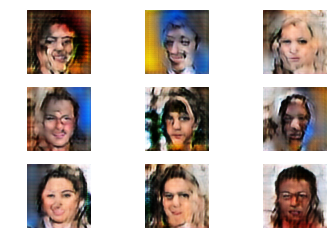

[[0.39600354]
 [0.28681955]
 [0.5289136 ]
 [0.5051952 ]
 [0.39354137]
 [0.3776799 ]
 [0.43942535]
 [0.35513645]
 [0.30180964]
 [0.41159818]
 [0.23345292]
 [0.40457806]
 [0.28504962]
 [0.2789094 ]
 [0.33943677]
 [0.26482695]
 [0.31906706]
 [0.37607005]
 [0.3950992 ]
 [0.27033535]
 [0.35153446]
 [0.31723455]
 [0.3078016 ]
 [0.4253806 ]
 [0.4627277 ]
 [0.35825235]
 [0.32919663]
 [0.3041655 ]
 [0.29305255]
 [0.4066982 ]
 [0.2986453 ]
 [0.5086369 ]
 [0.31525892]
 [0.38864356]
 [0.41410518]
 [0.33705533]
 [0.3404236 ]
 [0.3324105 ]
 [0.2513471 ]
 [0.21553558]
 [0.39310205]
 [0.2832684 ]
 [0.35763225]
 [0.3553257 ]
 [0.26234347]
 [0.42671773]
 [0.3644722 ]
 [0.43099877]
 [0.48702654]
 [0.3884688 ]
 [0.37900192]
 [0.37186775]
 [0.33609456]
 [0.25234795]
 [0.38949013]
 [0.28628445]
 [0.28828675]
 [0.311647  ]
 [0.31939274]
 [0.31257468]
 [0.38111323]
 [0.31283087]
 [0.33187696]
 [0.3588435 ]
 [0.40081912]
 [0.51242715]
 [0.37929446]
 [0.3290855 ]
 [0.423056  ]
 [0.4079107 ]
 [0.36552972]
 [0.40

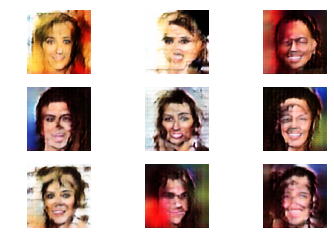

[[0.18933451]
 [0.18690526]
 [0.23670152]
 [0.2522266 ]
 [0.15003183]
 [0.21682695]
 [0.27638322]
 [0.2500556 ]
 [0.18087712]
 [0.43291146]
 [0.2560373 ]
 [0.2610287 ]
 [0.29101032]
 [0.19957122]
 [0.21612349]
 [0.20144519]
 [0.36952674]
 [0.1783553 ]
 [0.33355486]
 [0.18866873]
 [0.25334096]
 [0.21049279]
 [0.20359251]
 [0.31345838]
 [0.17695406]
 [0.25062376]
 [0.36286694]
 [0.26866782]
 [0.23121256]
 [0.17510375]
 [0.12687719]
 [0.16223773]
 [0.11224318]
 [0.37138367]
 [0.32051343]
 [0.2546933 ]
 [0.29260868]
 [0.28915566]
 [0.42464674]
 [0.10942394]
 [0.11742952]
 [0.44933486]
 [0.1815021 ]
 [0.11129925]
 [0.31921303]
 [0.11989841]
 [0.2329031 ]
 [0.08243993]
 [0.17666757]
 [0.29277208]
 [0.14699095]
 [0.46921727]
 [0.25114655]
 [0.1824193 ]
 [0.4933937 ]
 [0.2077685 ]
 [0.16266927]
 [0.37987757]
 [0.17491606]
 [0.19479841]
 [0.21256962]
 [0.21222827]
 [0.17883903]
 [0.24923259]
 [0.2394568 ]
 [0.30578423]
 [0.20734742]
 [0.24908024]
 [0.3469866 ]
 [0.20360759]
 [0.24827456]
 [0.25

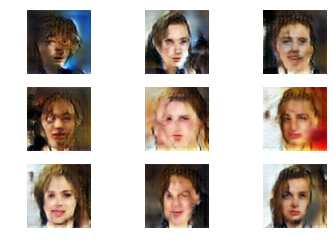

[[0.45961356]
 [0.36070883]
 [0.58050525]
 [0.5161836 ]
 [0.40918526]
 [0.46433574]
 [0.4862241 ]
 [0.44726938]
 [0.41122675]
 [0.40122718]
 [0.35739136]
 [0.48189652]
 [0.46654138]
 [0.4992524 ]
 [0.3477345 ]
 [0.469462  ]
 [0.3684661 ]
 [0.3514383 ]
 [0.33136514]
 [0.55673814]
 [0.4610469 ]
 [0.294047  ]
 [0.39283925]
 [0.39525908]
 [0.4597274 ]
 [0.5149842 ]
 [0.42780143]
 [0.42479217]
 [0.3954128 ]
 [0.6403543 ]
 [0.4560868 ]
 [0.467754  ]
 [0.5425842 ]
 [0.36320794]
 [0.43301293]
 [0.4372937 ]
 [0.4659053 ]
 [0.5038447 ]
 [0.4104268 ]
 [0.5369931 ]
 [0.43934435]
 [0.34930122]
 [0.55255   ]
 [0.44895947]
 [0.45939362]
 [0.37941194]
 [0.31157887]
 [0.504097  ]
 [0.35857874]
 [0.30021906]
 [0.459003  ]
 [0.31421712]
 [0.43524593]
 [0.44790068]
 [0.5098629 ]
 [0.39410645]
 [0.3818546 ]
 [0.35019928]
 [0.4420018 ]
 [0.40930632]
 [0.44960833]
 [0.4029878 ]
 [0.35446405]
 [0.45237333]
 [0.38672405]
 [0.40432206]
 [0.6118094 ]
 [0.3670875 ]
 [0.4269907 ]
 [0.4971815 ]
 [0.43419576]
 [0.50

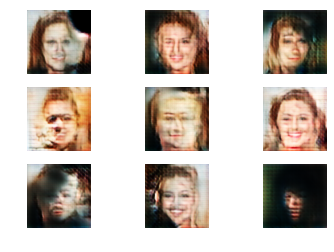

[[0.24002576]
 [0.34028322]
 [0.3221446 ]
 [0.3455097 ]
 [0.2302958 ]
 [0.45576218]
 [0.41358906]
 [0.25460184]
 [0.44404766]
 [0.30387485]
 [0.48614746]
 [0.2769404 ]
 [0.47756916]
 [0.46418118]
 [0.5587128 ]
 [0.35603082]
 [0.32725134]
 [0.38434055]
 [0.32045275]
 [0.485463  ]
 [0.3455945 ]
 [0.24922535]
 [0.29046428]
 [0.19797337]
 [0.4223519 ]
 [0.298586  ]
 [0.17550531]
 [0.2690362 ]
 [0.24348208]
 [0.24861917]
 [0.48001644]
 [0.35846013]
 [0.07023704]
 [0.16411445]
 [0.31639034]
 [0.24081057]
 [0.20512241]
 [0.35715377]
 [0.44867697]
 [0.15820023]
 [0.53512084]
 [0.27396792]
 [0.5413553 ]
 [0.36628008]
 [0.2643628 ]
 [0.40048152]
 [0.24544051]
 [0.31228402]
 [0.3317805 ]
 [0.3106326 ]
 [0.40183794]
 [0.44466567]
 [0.29237545]
 [0.2533536 ]
 [0.26449567]
 [0.2740249 ]
 [0.4355799 ]
 [0.31050968]
 [0.2875011 ]
 [0.34120578]
 [0.31953263]
 [0.43457788]
 [0.30916113]
 [0.34533322]
 [0.24799702]
 [0.17226669]
 [0.20500055]
 [0.37011197]
 [0.33124793]
 [0.691275  ]
 [0.2779442 ]
 [0.47

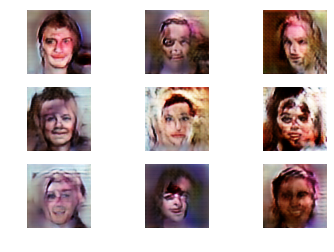

[[0.60574067]
 [0.52217436]
 [0.60649073]
 [0.7536884 ]
 [0.62175477]
 [0.56786513]
 [0.67345035]
 [0.5948286 ]
 [0.5216663 ]
 [0.5987782 ]
 [0.5830933 ]
 [0.47053462]
 [0.6593979 ]
 [0.61835766]
 [0.5557355 ]
 [0.6708169 ]
 [0.5231907 ]
 [0.5607574 ]
 [0.52117115]
 [0.5000632 ]
 [0.5220236 ]
 [0.7601124 ]
 [0.66086465]
 [0.48332995]
 [0.5347024 ]
 [0.59567684]
 [0.4488268 ]
 [0.6796087 ]
 [0.63535196]
 [0.6268683 ]
 [0.61641794]
 [0.5466055 ]
 [0.62621504]
 [0.5876258 ]
 [0.5378326 ]
 [0.54545677]
 [0.58536255]
 [0.6355798 ]
 [0.48303837]
 [0.50270927]
 [0.4669326 ]
 [0.52292913]
 [0.47305143]
 [0.4182959 ]
 [0.4821019 ]
 [0.5995449 ]
 [0.6606234 ]
 [0.6408957 ]
 [0.6565041 ]
 [0.5315807 ]
 [0.5253622 ]
 [0.54347676]
 [0.7466075 ]
 [0.6124309 ]
 [0.54072607]
 [0.61272   ]
 [0.53817403]
 [0.71111315]
 [0.52460074]
 [0.67529887]
 [0.6995253 ]
 [0.42727953]
 [0.42181057]
 [0.49140635]
 [0.55734265]
 [0.6149478 ]
 [0.6251706 ]
 [0.58083963]
 [0.57845896]
 [0.54421675]
 [0.5585698 ]
 [0.60

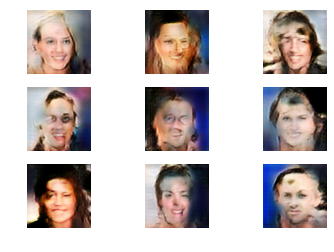

[[0.35525215]
 [0.3873403 ]
 [0.5065402 ]
 [0.35223138]
 [0.3686117 ]
 [0.63819987]
 [0.49826798]
 [0.54626954]
 [0.52787083]
 [0.4140979 ]
 [0.36531967]
 [0.4326231 ]
 [0.21713817]
 [0.57245976]
 [0.35260898]
 [0.37812763]
 [0.5498568 ]
 [0.353705  ]
 [0.42803437]
 [0.33089796]
 [0.49163425]
 [0.39073518]
 [0.46840698]
 [0.38138676]
 [0.41422623]
 [0.3212207 ]
 [0.4159122 ]
 [0.3237464 ]
 [0.38128278]
 [0.4790134 ]
 [0.2615984 ]
 [0.41077274]
 [0.46512502]
 [0.27292198]
 [0.5726552 ]
 [0.31121036]
 [0.31182975]
 [0.3624064 ]
 [0.32610625]
 [0.384972  ]
 [0.35841346]
 [0.5924703 ]
 [0.37105852]
 [0.2960736 ]
 [0.3149367 ]
 [0.26731604]
 [0.3206684 ]
 [0.37338912]
 [0.28580385]
 [0.35592926]
 [0.40806666]
 [0.55251384]
 [0.24187839]
 [0.3855934 ]
 [0.38150367]
 [0.29779518]
 [0.29338223]
 [0.4305187 ]
 [0.4265387 ]
 [0.34630936]
 [0.3106981 ]
 [0.6597334 ]
 [0.5312356 ]
 [0.44605267]
 [0.36783057]
 [0.4337576 ]
 [0.27300936]
 [0.4012011 ]
 [0.35757625]
 [0.46756634]
 [0.34184825]
 [0.42

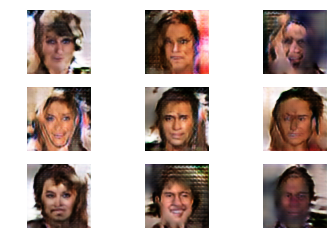

[[0.29323184]
 [0.25063908]
 [0.3771236 ]
 [0.25771695]
 [0.23274156]
 [0.22855276]
 [0.4635261 ]
 [0.32635438]
 [0.46646443]
 [0.38637543]
 [0.3187799 ]
 [0.25524104]
 [0.4052471 ]
 [0.41491234]
 [0.24596462]
 [0.19983873]
 [0.28977445]
 [0.28039038]
 [0.27268624]
 [0.31236023]
 [0.19097152]
 [0.40522796]
 [0.55578554]
 [0.36519682]
 [0.27289078]
 [0.25338197]
 [0.262123  ]
 [0.34766412]
 [0.30776215]
 [0.44428125]
 [0.28556   ]
 [0.3830704 ]
 [0.36544117]
 [0.29947767]
 [0.3187957 ]
 [0.26036286]
 [0.42492557]
 [0.24178284]
 [0.286741  ]
 [0.3207816 ]
 [0.36849195]
 [0.35378987]
 [0.23103097]
 [0.3833542 ]
 [0.23643523]
 [0.31727076]
 [0.20204052]
 [0.33532834]
 [0.28238326]
 [0.36410308]
 [0.39693102]
 [0.35005683]
 [0.28205863]
 [0.37989923]
 [0.30374303]
 [0.2689106 ]
 [0.32143646]
 [0.30319336]
 [0.2340503 ]
 [0.24883845]
 [0.34360173]
 [0.296051  ]
 [0.35275093]
 [0.24768165]
 [0.33419046]
 [0.29295212]
 [0.37881926]
 [0.4031524 ]
 [0.40448254]
 [0.27876613]
 [0.25120437]
 [0.32

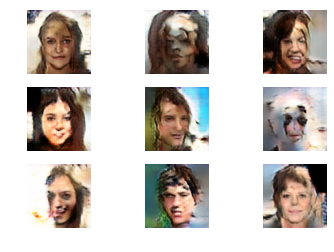

[[0.36609185]
 [0.5288117 ]
 [0.45629683]
 [0.385479  ]
 [0.31903815]
 [0.32629535]
 [0.4184982 ]
 [0.30354416]
 [0.3909625 ]
 [0.40257812]
 [0.21321377]
 [0.3902426 ]
 [0.52159894]
 [0.2991701 ]
 [0.40670347]
 [0.30862027]
 [0.3579122 ]
 [0.37485316]
 [0.26188064]
 [0.42604408]
 [0.4181719 ]
 [0.30165547]
 [0.51760876]
 [0.30964568]
 [0.18272027]
 [0.3473001 ]
 [0.3361321 ]
 [0.30964297]
 [0.43510988]
 [0.2912284 ]
 [0.27526408]
 [0.2879003 ]
 [0.2395845 ]
 [0.24449536]
 [0.39989668]
 [0.4146371 ]
 [0.360146  ]
 [0.34500438]
 [0.2878285 ]
 [0.2510301 ]
 [0.1742759 ]
 [0.32706392]
 [0.4043535 ]
 [0.3239293 ]
 [0.41874278]
 [0.24540469]
 [0.36284742]
 [0.2952389 ]
 [0.3183149 ]
 [0.43583426]
 [0.48558882]
 [0.4194183 ]
 [0.360206  ]
 [0.24018398]
 [0.28624415]
 [0.34693372]
 [0.35825408]
 [0.33389077]
 [0.38456407]
 [0.51496977]
 [0.21414134]
 [0.4052404 ]
 [0.26015592]
 [0.2481054 ]
 [0.3525418 ]
 [0.334791  ]
 [0.49147677]
 [0.24382973]
 [0.44948125]
 [0.29572588]
 [0.27547878]
 [0.36

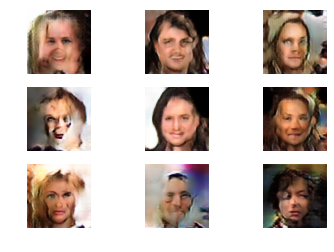

[[0.2870342 ]
 [0.20720288]
 [0.45597044]
 [0.29342288]
 [0.36412275]
 [0.31257224]
 [0.28756952]
 [0.28648347]
 [0.3024485 ]
 [0.38008004]
 [0.29289454]
 [0.40511686]
 [0.13355294]
 [0.22401315]
 [0.16103396]
 [0.364373  ]
 [0.35577467]
 [0.31394643]
 [0.31566715]
 [0.27825493]
 [0.29177535]
 [0.23379067]
 [0.35707277]
 [0.32585496]
 [0.33045214]
 [0.26273546]
 [0.5142541 ]
 [0.30707347]
 [0.34394   ]
 [0.34681505]
 [0.25029737]
 [0.3055812 ]
 [0.20593303]
 [0.17678183]
 [0.29770264]
 [0.36105138]
 [0.35371587]
 [0.20455849]
 [0.36368114]
 [0.27226126]
 [0.49540657]
 [0.3377343 ]
 [0.27574015]
 [0.3482892 ]
 [0.35277033]
 [0.5495626 ]
 [0.28463143]
 [0.36377877]
 [0.23287645]
 [0.45157638]
 [0.31102648]
 [0.37591484]
 [0.3735116 ]
 [0.25712925]
 [0.35906246]
 [0.18330702]
 [0.32150206]
 [0.41790944]
 [0.2973007 ]
 [0.48527718]
 [0.24747512]
 [0.36212188]
 [0.22197026]
 [0.26355585]
 [0.25633925]
 [0.2502337 ]
 [0.43571535]
 [0.4909339 ]
 [0.3421864 ]
 [0.43065968]
 [0.42048535]
 [0.24

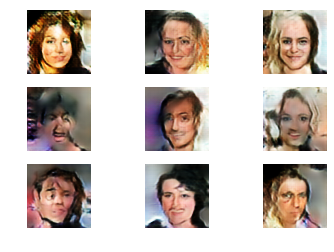

[[0.5458642 ]
 [0.39818603]
 [0.45597297]
 [0.44625154]
 [0.555699  ]
 [0.5705955 ]
 [0.4292762 ]
 [0.4731489 ]
 [0.40715417]
 [0.39989406]
 [0.3759185 ]
 [0.5179979 ]
 [0.46919182]
 [0.43543068]
 [0.6223501 ]
 [0.51494145]
 [0.5052929 ]
 [0.50910103]
 [0.51379925]
 [0.48416185]
 [0.31798595]
 [0.7111085 ]
 [0.34509173]
 [0.23275134]
 [0.52783966]
 [0.42550224]
 [0.58127666]
 [0.60536623]
 [0.41411102]
 [0.45052937]
 [0.39687872]
 [0.50795275]
 [0.49781126]
 [0.22202581]
 [0.31527   ]
 [0.5219168 ]
 [0.48877487]
 [0.51264   ]
 [0.5562129 ]
 [0.38304132]
 [0.40002924]
 [0.39653036]
 [0.54816234]
 [0.38641828]
 [0.42534742]
 [0.3644284 ]
 [0.41592938]
 [0.5165536 ]
 [0.4385583 ]
 [0.28062323]
 [0.5031906 ]
 [0.52703196]
 [0.47906137]
 [0.47456884]
 [0.41014755]
 [0.30399007]
 [0.49404666]
 [0.5139802 ]
 [0.5011728 ]
 [0.45889708]
 [0.19555485]
 [0.5375958 ]
 [0.44839087]
 [0.41414696]
 [0.4275948 ]
 [0.44837368]
 [0.52689266]
 [0.43246466]
 [0.55013657]
 [0.42787018]
 [0.5388552 ]
 [0.50

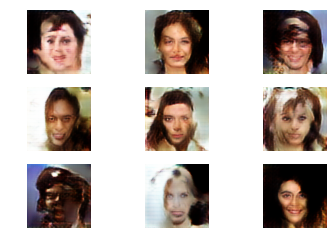

[[0.18762353]
 [0.15921003]
 [0.25771272]
 [0.23500258]
 [0.32090113]
 [0.17438033]
 [0.21135828]
 [0.20740479]
 [0.472294  ]
 [0.14834154]
 [0.37125695]
 [0.29908216]
 [0.07755849]
 [0.3868373 ]
 [0.3704193 ]
 [0.25246465]
 [0.22564876]
 [0.13447005]
 [0.53192496]
 [0.34777108]
 [0.13890827]
 [0.2308928 ]
 [0.22938025]
 [0.27240002]
 [0.2952902 ]
 [0.18818474]
 [0.3259522 ]
 [0.34872597]
 [0.32929045]
 [0.2839986 ]
 [0.34488356]
 [0.23810542]
 [0.28638384]
 [0.150419  ]
 [0.35018244]
 [0.161665  ]
 [0.19564748]
 [0.12385046]
 [0.47493455]
 [0.16653961]
 [0.26537457]
 [0.18263   ]
 [0.33211666]
 [0.41409755]
 [0.08932838]
 [0.41859823]
 [0.51373845]
 [0.3178954 ]
 [0.47696057]
 [0.30174875]
 [0.30677834]
 [0.13117096]
 [0.37579244]
 [0.2584406 ]
 [0.22758567]
 [0.14437008]
 [0.38844386]
 [0.20969522]
 [0.3440494 ]
 [0.35925734]
 [0.14011261]
 [0.40500346]
 [0.46913585]
 [0.4967761 ]
 [0.16037324]
 [0.33419344]
 [0.39864373]
 [0.23749831]
 [0.34369883]
 [0.38769996]
 [0.10879943]
 [0.41

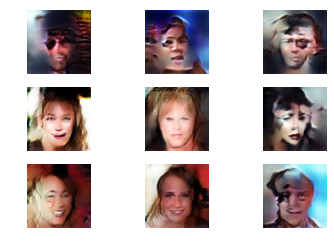

[[0.08733597]
 [0.10141948]
 [0.10653749]
 [0.13254687]
 [0.09987044]
 [0.01363778]
 [0.09619939]
 [0.10856783]
 [0.07672924]
 [0.03559938]
 [0.05494025]
 [0.28528792]
 [0.02308014]
 [0.02218825]
 [0.09580961]
 [0.24393854]
 [0.2005992 ]
 [0.06118125]
 [0.25349322]
 [0.03717473]
 [0.05450973]
 [0.09497833]
 [0.22414985]
 [0.02823782]
 [0.1368171 ]
 [0.03772235]
 [0.03623146]
 [0.09310699]
 [0.18430358]
 [0.04298314]
 [0.09400982]
 [0.06343311]
 [0.0792847 ]
 [0.13755995]
 [0.04058635]
 [0.03238568]
 [0.05984843]
 [0.07160082]
 [0.1137839 ]
 [0.08844537]
 [0.13247421]
 [0.04993474]
 [0.12793344]
 [0.06590959]
 [0.01760814]
 [0.11828512]
 [0.03515625]
 [0.17193335]
 [0.01605076]
 [0.05047351]
 [0.02019957]
 [0.03929442]
 [0.05042756]
 [0.06369868]
 [0.01175833]
 [0.0698553 ]
 [0.02396789]
 [0.15562174]
 [0.18566081]
 [0.05655527]
 [0.04766709]
 [0.12635177]
 [0.01430759]
 [0.15422791]
 [0.08117914]
 [0.06808227]
 [0.19094077]
 [0.21363693]
 [0.05977389]
 [0.20356205]
 [0.07774529]
 [0.14

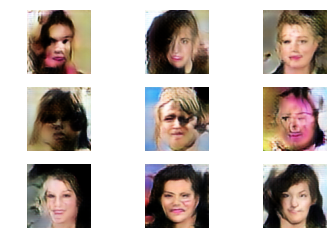

[[0.22276393]
 [0.3976549 ]
 [0.21972838]
 [0.07231337]
 [0.44791067]
 [0.26324812]
 [0.18028584]
 [0.3803605 ]
 [0.12774265]
 [0.18186182]
 [0.25154397]
 [0.2463732 ]
 [0.19819513]
 [0.5065787 ]
 [0.54822856]
 [0.09255636]
 [0.07344484]
 [0.2303873 ]
 [0.2320705 ]
 [0.08427954]
 [0.15200225]
 [0.10870188]
 [0.46075463]
 [0.33312798]
 [0.14746934]
 [0.22168657]
 [0.25179896]
 [0.08649656]
 [0.10902578]
 [0.18859044]
 [0.24514464]
 [0.31838828]
 [0.12745854]
 [0.35752696]
 [0.1319027 ]
 [0.24380103]
 [0.09839585]
 [0.15052193]
 [0.20184502]
 [0.11062935]
 [0.22741953]
 [0.12197515]
 [0.25085568]
 [0.13630292]
 [0.260054  ]
 [0.4040817 ]
 [0.13256916]
 [0.22152618]
 [0.387295  ]
 [0.08552468]
 [0.34895703]
 [0.18755713]
 [0.27459186]
 [0.5663005 ]
 [0.31927502]
 [0.25629297]
 [0.3637783 ]
 [0.13774204]
 [0.16438934]
 [0.20521915]
 [0.14706308]
 [0.21036077]
 [0.13894045]
 [0.29964206]
 [0.31337625]
 [0.08372113]
 [0.15351614]
 [0.19099748]
 [0.18299374]
 [0.1922113 ]
 [0.12527108]
 [0.12

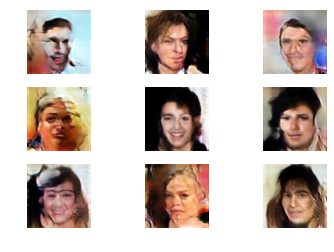

[[0.12930492]
 [0.06905276]
 [0.38624406]
 [0.11092278]
 [0.09897539]
 [0.07034862]
 [0.05986786]
 [0.03168991]
 [0.33432823]
 [0.16964504]
 [0.12141812]
 [0.05950955]
 [0.16448104]
 [0.09514987]
 [0.07891405]
 [0.07736123]
 [0.34194103]
 [0.41579217]
 [0.13175374]
 [0.27092993]
 [0.09357971]
 [0.11535758]
 [0.38519067]
 [0.295181  ]
 [0.4191806 ]
 [0.18793815]
 [0.09244332]
 [0.3380518 ]
 [0.09642848]
 [0.11611032]
 [0.1088205 ]
 [0.05477092]
 [0.1641492 ]
 [0.33308014]
 [0.07611406]
 [0.13759077]
 [0.13997877]
 [0.01424065]
 [0.04385263]
 [0.14113712]
 [0.2577734 ]
 [0.17458549]
 [0.33648324]
 [0.23575306]
 [0.35310772]
 [0.31211486]
 [0.02336413]
 [0.13130164]
 [0.19946828]
 [0.07723242]
 [0.04889032]
 [0.04357794]
 [0.14566928]
 [0.0359886 ]
 [0.05768755]
 [0.05048308]
 [0.24359667]
 [0.2663408 ]
 [0.3286807 ]
 [0.21338099]
 [0.32431054]
 [0.17187038]
 [0.346165  ]
 [0.2685007 ]
 [0.11912507]
 [0.15189418]
 [0.10434747]
 [0.35640484]
 [0.1515249 ]
 [0.2709167 ]
 [0.071843  ]
 [0.34

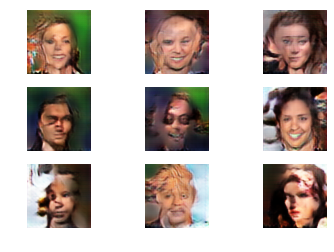

[[0.28197134]
 [0.45054382]
 [0.3578537 ]
 [0.4010415 ]
 [0.30253607]
 [0.1423097 ]
 [0.4854262 ]
 [0.23650128]
 [0.16413075]
 [0.1681245 ]
 [0.23366794]
 [0.14464504]
 [0.48168638]
 [0.25153896]
 [0.3190518 ]
 [0.29948324]
 [0.52019805]
 [0.18388963]
 [0.46257883]
 [0.20944288]
 [0.4666487 ]
 [0.2968205 ]
 [0.3054047 ]
 [0.38170323]
 [0.30069435]
 [0.19797298]
 [0.24890596]
 [0.11064628]
 [0.31766576]
 [0.16983   ]
 [0.23059589]
 [0.28579095]
 [0.3048408 ]
 [0.38686872]
 [0.31642604]
 [0.44656116]
 [0.201621  ]
 [0.19530633]
 [0.28588593]
 [0.24852228]
 [0.48164272]
 [0.18217474]
 [0.18744782]
 [0.18221986]
 [0.12637118]
 [0.35477614]
 [0.21600917]
 [0.48095572]
 [0.2712496 ]
 [0.23108196]
 [0.23078135]
 [0.1804857 ]
 [0.22668517]
 [0.3869609 ]
 [0.39527893]
 [0.3335197 ]
 [0.28056294]
 [0.16490197]
 [0.2219905 ]
 [0.38315728]
 [0.44709548]
 [0.27125752]
 [0.16526228]
 [0.19403914]
 [0.07194   ]
 [0.20147568]
 [0.30667418]
 [0.34386477]
 [0.28684533]
 [0.16452205]
 [0.351836  ]
 [0.17

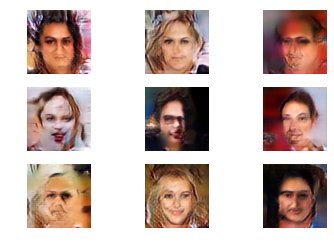

[[0.32877183]
 [0.08856687]
 [0.08172455]
 [0.2739792 ]
 [0.09082267]
 [0.3417983 ]
 [0.3347816 ]
 [0.25616574]
 [0.14414048]
 [0.15213832]
 [0.18613318]
 [0.23618045]
 [0.08998811]
 [0.11843896]
 [0.25440353]
 [0.15742984]
 [0.12219486]
 [0.083471  ]
 [0.1774554 ]
 [0.22514972]
 [0.3435397 ]
 [0.1522069 ]
 [0.21142954]
 [0.10185313]
 [0.32841384]
 [0.10558921]
 [0.3898259 ]
 [0.12886527]
 [0.26747414]
 [0.21047837]
 [0.35645252]
 [0.3086313 ]
 [0.0773057 ]
 [0.3192974 ]
 [0.17225826]
 [0.19231722]
 [0.1796143 ]
 [0.23418495]
 [0.27149826]
 [0.07793567]
 [0.27613837]
 [0.41963756]
 [0.41002053]
 [0.34149417]
 [0.28143805]
 [0.3976072 ]
 [0.32736492]
 [0.09781167]
 [0.08350116]
 [0.22092098]
 [0.25053522]
 [0.18195808]
 [0.21160424]
 [0.2503609 ]
 [0.04567194]
 [0.16299495]
 [0.39292508]
 [0.24718553]
 [0.29935646]
 [0.17728731]
 [0.3605145 ]
 [0.15065715]
 [0.3575719 ]
 [0.19208914]
 [0.17294726]
 [0.21736246]
 [0.20665747]
 [0.09201649]
 [0.13007298]
 [0.25949907]
 [0.2257044 ]
 [0.16

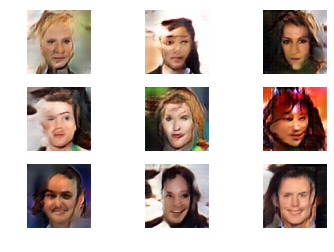

[[0.5169564 ]
 [0.43918693]
 [0.41262767]
 [0.5621379 ]
 [0.43236437]
 [0.5565105 ]
 [0.63478076]
 [0.55747914]
 [0.45621324]
 [0.37062114]
 [0.53345776]
 [0.42227435]
 [0.5616447 ]
 [0.4449029 ]
 [0.4058833 ]
 [0.50620526]
 [0.45786816]
 [0.4624369 ]
 [0.27747372]
 [0.36622018]
 [0.3923624 ]
 [0.36185914]
 [0.53510606]
 [0.48743537]
 [0.34651023]
 [0.3512826 ]
 [0.32629794]
 [0.49815485]
 [0.4065228 ]
 [0.5015701 ]
 [0.47444478]
 [0.27228302]
 [0.46016556]
 [0.60133547]
 [0.26278314]
 [0.54872465]
 [0.5119948 ]
 [0.48599592]
 [0.31440395]
 [0.44826615]
 [0.3726915 ]
 [0.47544354]
 [0.48723876]
 [0.5402887 ]
 [0.40326044]
 [0.4586237 ]
 [0.31279966]
 [0.5441131 ]
 [0.4809152 ]
 [0.3213663 ]
 [0.39593917]
 [0.44648883]
 [0.4898195 ]
 [0.32909626]
 [0.5329615 ]
 [0.55342376]
 [0.33659133]
 [0.29064497]
 [0.5217966 ]
 [0.47370416]
 [0.50867367]
 [0.31298643]
 [0.4174901 ]
 [0.45175597]
 [0.4761858 ]
 [0.3549386 ]
 [0.49246198]
 [0.4321326 ]
 [0.5292489 ]
 [0.45837757]
 [0.6202186 ]
 [0.42

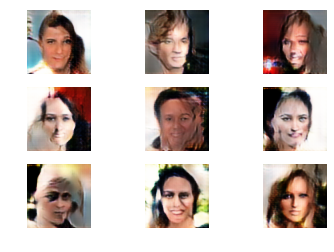

[[0.57110363]
 [0.37822956]
 [0.37402833]
 [0.30331177]
 [0.42551044]
 [0.27327663]
 [0.20572272]
 [0.49537393]
 [0.27841735]
 [0.5072829 ]
 [0.22906488]
 [0.6427443 ]
 [0.20806983]
 [0.40432018]
 [0.61268306]
 [0.35930604]
 [0.38682234]
 [0.4531137 ]
 [0.50064707]
 [0.3516423 ]
 [0.33377606]
 [0.2642939 ]
 [0.5124509 ]
 [0.3024704 ]
 [0.33636546]
 [0.39525253]
 [0.5414214 ]
 [0.4711215 ]
 [0.31197774]
 [0.39487988]
 [0.273578  ]
 [0.3587674 ]
 [0.4086658 ]
 [0.36721066]
 [0.5291778 ]
 [0.54422295]
 [0.43974847]
 [0.2960761 ]
 [0.39551803]
 [0.5727043 ]
 [0.19962174]
 [0.266395  ]
 [0.5062566 ]
 [0.25894392]
 [0.3776939 ]
 [0.27620918]
 [0.35189956]
 [0.58973926]
 [0.50869924]
 [0.33242416]
 [0.29363656]
 [0.42092994]
 [0.6392339 ]
 [0.34015048]
 [0.33121324]
 [0.34384632]
 [0.54507446]
 [0.43651178]
 [0.22024179]
 [0.21248764]
 [0.51306015]
 [0.5503311 ]
 [0.5262076 ]
 [0.50113165]
 [0.42983413]
 [0.36458707]
 [0.6023142 ]
 [0.21613067]
 [0.5852344 ]
 [0.3398865 ]
 [0.3891822 ]
 [0.40

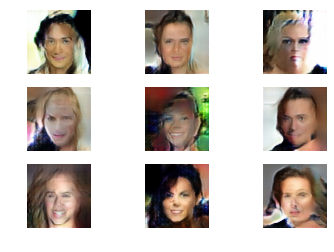

[[0.26292259]
 [0.42765376]
 [0.43094522]
 [0.45255813]
 [0.36549634]
 [0.4093487 ]
 [0.50068283]
 [0.3789038 ]
 [0.27782816]
 [0.22446215]
 [0.29188597]
 [0.5356114 ]
 [0.5680006 ]
 [0.5479051 ]
 [0.4100036 ]
 [0.5354901 ]
 [0.2348549 ]
 [0.31687927]
 [0.53718174]
 [0.4052241 ]
 [0.4778915 ]
 [0.25202665]
 [0.25698066]
 [0.50119114]
 [0.4466098 ]
 [0.3734814 ]
 [0.24923602]
 [0.26010078]
 [0.3285907 ]
 [0.64429355]
 [0.36297995]
 [0.36879605]
 [0.6411115 ]
 [0.45203966]
 [0.22108841]
 [0.41055652]
 [0.41041806]
 [0.31564295]
 [0.36676428]
 [0.30412441]
 [0.31836522]
 [0.35596076]
 [0.31125295]
 [0.52850163]
 [0.3075482 ]
 [0.622934  ]
 [0.32347032]
 [0.4013255 ]
 [0.42149222]
 [0.28488344]
 [0.34610343]
 [0.30948013]
 [0.30564737]
 [0.2858773 ]
 [0.2225421 ]
 [0.29645562]
 [0.32123747]
 [0.24312064]
 [0.39915496]
 [0.32053354]
 [0.41152766]
 [0.2790969 ]
 [0.22729412]
 [0.25988305]
 [0.48937875]
 [0.48733824]
 [0.25605172]
 [0.3037822 ]
 [0.5758525 ]
 [0.40446147]
 [0.14163989]
 [0.32

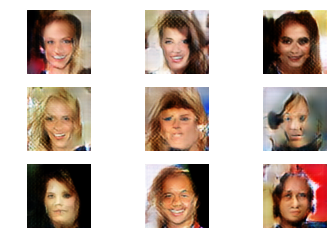

[[0.3800028 ]
 [0.16666222]
 [0.43270615]
 [0.17400432]
 [0.06548911]
 [0.1109477 ]
 [0.29300058]
 [0.04615331]
 [0.05863509]
 [0.17092028]
 [0.13454401]
 [0.25361586]
 [0.20197365]
 [0.09387699]
 [0.0159595 ]
 [0.2567017 ]
 [0.03693968]
 [0.13793206]
 [0.2289415 ]
 [0.3199902 ]
 [0.20252019]
 [0.2378239 ]
 [0.26592457]
 [0.05386129]
 [0.21028757]
 [0.07158312]
 [0.05328804]
 [0.19679973]
 [0.06775132]
 [0.15203834]
 [0.05822673]
 [0.17310438]
 [0.04526332]
 [0.05440265]
 [0.07202637]
 [0.13538158]
 [0.12185192]
 [0.06389633]
 [0.27102828]
 [0.02688837]
 [0.13840654]
 [0.02682093]
 [0.14668593]
 [0.01099211]
 [0.32833356]
 [0.06669945]
 [0.06829187]
 [0.2305628 ]
 [0.1231958 ]
 [0.20224518]
 [0.15925851]
 [0.23722088]
 [0.10280392]
 [0.04138991]
 [0.182239  ]
 [0.06502038]
 [0.02492809]
 [0.06398687]
 [0.05525032]
 [0.23871079]
 [0.02058601]
 [0.04232213]
 [0.08543602]
 [0.1875728 ]
 [0.14761308]
 [0.09588981]
 [0.05878678]
 [0.15093157]
 [0.12819088]
 [0.10931584]
 [0.24384502]
 [0.13

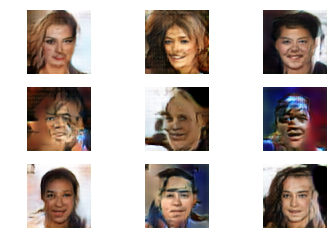

[[0.0405426 ]
 [0.11416849]
 [0.16959032]
 [0.12520668]
 [0.26733658]
 [0.02079651]
 [0.08531952]
 [0.1889508 ]
 [0.13014552]
 [0.10201493]
 [0.23994285]
 [0.15266728]
 [0.36786884]
 [0.07617718]
 [0.3750256 ]
 [0.20418045]
 [0.23791957]
 [0.22057801]
 [0.19860116]
 [0.25226092]
 [0.07026809]
 [0.18390611]
 [0.35112202]
 [0.06226847]
 [0.03730831]
 [0.11280376]
 [0.3069467 ]
 [0.20509616]
 [0.03180787]
 [0.25128096]
 [0.10534984]
 [0.36350018]
 [0.27772468]
 [0.22120434]
 [0.15780863]
 [0.11543104]
 [0.18061912]
 [0.249163  ]
 [0.31662646]
 [0.23380989]
 [0.14441502]
 [0.37916568]
 [0.31920135]
 [0.05904046]
 [0.27036834]
 [0.04038817]
 [0.3278916 ]
 [0.37909734]
 [0.1147294 ]
 [0.09605652]
 [0.03079683]
 [0.08145878]
 [0.16439193]
 [0.2421867 ]
 [0.30322772]
 [0.2917297 ]
 [0.12636948]
 [0.02161512]
 [0.2348012 ]
 [0.11482787]
 [0.11293274]
 [0.12051392]
 [0.3026884 ]
 [0.2595569 ]
 [0.14504275]
 [0.07761076]
 [0.01917908]
 [0.14599589]
 [0.02673799]
 [0.3933443 ]
 [0.02144688]
 [0.26

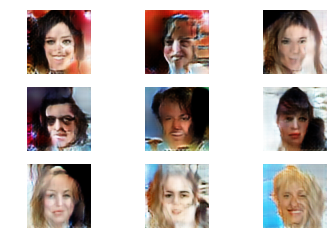

[[1.09259039e-01]
 [3.80750000e-02]
 [9.94856656e-02]
 [2.24229246e-01]
 [2.21332908e-03]
 [4.93437052e-02]
 [3.22791934e-03]
 [1.57271624e-02]
 [1.62385106e-02]
 [1.52457327e-01]
 [2.79931426e-02]
 [8.82182717e-02]
 [5.96975386e-02]
 [1.84975266e-02]
 [8.78897905e-02]
 [1.85494453e-01]
 [6.38246536e-04]
 [1.06276870e-02]
 [2.76180327e-01]
 [4.51348722e-02]
 [5.98227978e-03]
 [1.56927288e-01]
 [1.45679712e-03]
 [2.92184055e-02]
 [7.00561702e-02]
 [4.19124961e-03]
 [5.93733788e-03]
 [3.85645032e-03]
 [4.00494337e-02]
 [4.98472750e-02]
 [2.17632353e-01]
 [1.60112977e-03]
 [1.30215108e-01]
 [4.93771732e-02]
 [2.06421554e-01]
 [1.27640367e-03]
 [1.17341846e-01]
 [8.09684992e-02]
 [4.72826064e-02]
 [7.59389997e-02]
 [3.92658412e-02]
 [6.07338250e-02]
 [9.15923715e-03]
 [2.19007671e-01]
 [2.09150046e-01]
 [4.69094217e-02]
 [2.46714354e-02]
 [3.36526036e-02]
 [4.36958671e-03]
 [2.43766010e-02]
 [2.41282165e-01]
 [2.34665573e-02]
 [1.25691891e-02]
 [4.48885262e-02]
 [3.18356395e-01]
 [2.099907

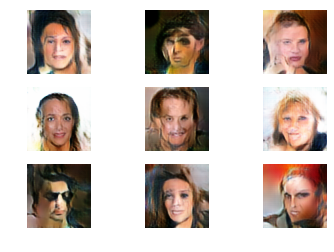

[[0.2908401 ]
 [0.26457292]
 [0.31649622]
 [0.19553983]
 [0.30222017]
 [0.16664743]
 [0.21617287]
 [0.33590716]
 [0.352619  ]
 [0.21998748]
 [0.270297  ]
 [0.1353231 ]
 [0.19581595]
 [0.2993319 ]
 [0.44784442]
 [0.19615632]
 [0.3438536 ]
 [0.49384105]
 [0.22555372]
 [0.656656  ]
 [0.45374355]
 [0.2631794 ]
 [0.33966064]
 [0.50718534]
 [0.1849733 ]
 [0.46806198]
 [0.18805403]
 [0.29576957]
 [0.43679613]
 [0.68603367]
 [0.268588  ]
 [0.29250938]
 [0.05956331]
 [0.31968534]
 [0.3161316 ]
 [0.3300631 ]
 [0.33203316]
 [0.34548348]
 [0.43883246]
 [0.37514198]
 [0.37703872]
 [0.45449308]
 [0.12859187]
 [0.23912263]
 [0.43217534]
 [0.24642813]
 [0.43426928]
 [0.3322547 ]
 [0.24301833]
 [0.30378205]
 [0.23568973]
 [0.39438915]
 [0.10897255]
 [0.1430211 ]
 [0.12347826]
 [0.38573316]
 [0.08329856]
 [0.22785887]
 [0.6267415 ]
 [0.46614474]
 [0.4742285 ]
 [0.4607519 ]
 [0.32288462]
 [0.27111125]
 [0.5297608 ]
 [0.39110616]
 [0.28737593]
 [0.4809663 ]
 [0.27787825]
 [0.3731258 ]
 [0.3737416 ]
 [0.26

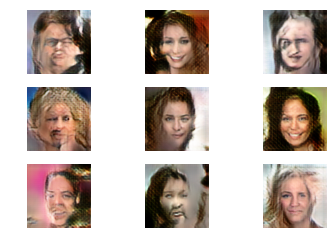

[[0.09786177]
 [0.00342512]
 [0.02805391]
 [0.20524314]
 [0.0067924 ]
 [0.00209436]
 [0.14545172]
 [0.06158492]
 [0.08669007]
 [0.01758462]
 [0.03038472]
 [0.05616871]
 [0.08949178]
 [0.08519381]
 [0.2244772 ]
 [0.23488769]
 [0.06005186]
 [0.00604048]
 [0.25336927]
 [0.0965519 ]
 [0.02484041]
 [0.02506217]
 [0.08960789]
 [0.01690212]
 [0.08785266]
 [0.22398123]
 [0.02398837]
 [0.00274229]
 [0.02040967]
 [0.01680142]
 [0.00705758]
 [0.00486511]
 [0.00865299]
 [0.08304667]
 [0.00783509]
 [0.00698659]
 [0.01372734]
 [0.1312316 ]
 [0.00594887]
 [0.01666057]
 [0.01594287]
 [0.00586897]
 [0.06784722]
 [0.01265347]
 [0.00179932]
 [0.20386043]
 [0.20669454]
 [0.02386129]
 [0.00972027]
 [0.00395179]
 [0.02901345]
 [0.00136131]
 [0.0661377 ]
 [0.09920183]
 [0.01485604]
 [0.0254353 ]
 [0.00164488]
 [0.01057357]
 [0.03663617]
 [0.14650527]
 [0.0998489 ]
 [0.00846341]
 [0.00166607]
 [0.26339263]
 [0.01255339]
 [0.03337923]
 [0.14890295]
 [0.00088471]
 [0.00693384]
 [0.01525551]
 [0.04296234]
 [0.01

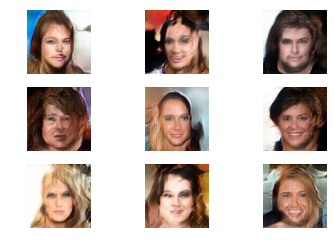

[[0.02215257]
 [0.01322836]
 [0.12257177]
 [0.03100255]
 [0.02338773]
 [0.03647372]
 [0.0079844 ]
 [0.1722503 ]
 [0.03486773]
 [0.00860709]
 [0.00806493]
 [0.13692403]
 [0.02857229]
 [0.0422208 ]
 [0.00995699]
 [0.03456897]
 [0.06464866]
 [0.0035156 ]
 [0.01288062]
 [0.15920252]
 [0.00582632]
 [0.00916606]
 [0.00475818]
 [0.00109294]
 [0.0057475 ]
 [0.01174077]
 [0.0110341 ]
 [0.00102237]
 [0.00210598]
 [0.03074768]
 [0.00794205]
 [0.00974983]
 [0.01662859]
 [0.02060533]
 [0.00430343]
 [0.0009214 ]
 [0.05938211]
 [0.14397782]
 [0.00319272]
 [0.00819778]
 [0.23621663]
 [0.0258283 ]
 [0.12018207]
 [0.02413356]
 [0.01915807]
 [0.00895503]
 [0.00121623]
 [0.00386956]
 [0.01609996]
 [0.01835012]
 [0.00594828]
 [0.00566122]
 [0.00795096]
 [0.0049288 ]
 [0.00469363]
 [0.0347282 ]
 [0.06745288]
 [0.04689321]
 [0.08377123]
 [0.00448781]
 [0.03366369]
 [0.02434728]
 [0.17223057]
 [0.02002457]
 [0.02680227]
 [0.10745856]
 [0.01414359]
 [0.1124098 ]
 [0.01839191]
 [0.01213714]
 [0.00957549]
 [0.09

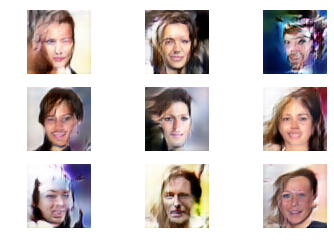

[[0.5190686 ]
 [0.11957082]
 [0.32038224]
 [0.47011137]
 [0.2927794 ]
 [0.19984928]
 [0.24736127]
 [0.18777993]
 [0.4757163 ]
 [0.20390815]
 [0.36388895]
 [0.31298655]
 [0.39212137]
 [0.19788942]
 [0.24541467]
 [0.25119007]
 [0.15689242]
 [0.18830493]
 [0.3695812 ]
 [0.35250652]
 [0.44419357]
 [0.24040526]
 [0.29034758]
 [0.59620047]
 [0.27985644]
 [0.5605191 ]
 [0.41697806]
 [0.39685464]
 [0.18062946]
 [0.25351748]
 [0.22057882]
 [0.3927773 ]
 [0.401861  ]
 [0.33905575]
 [0.2521664 ]
 [0.42932403]
 [0.5247802 ]
 [0.63219345]
 [0.3922459 ]
 [0.52004117]
 [0.20982972]
 [0.459017  ]
 [0.50231975]
 [0.34850845]
 [0.2611907 ]
 [0.263543  ]
 [0.30731282]
 [0.3211491 ]
 [0.2547659 ]
 [0.4994141 ]
 [0.6482519 ]
 [0.13542774]
 [0.24360222]
 [0.36782527]
 [0.3223334 ]
 [0.24587256]
 [0.11603862]
 [0.56872284]
 [0.61998737]
 [0.389745  ]
 [0.24852303]
 [0.37024447]
 [0.4165928 ]
 [0.19301376]
 [0.12241134]
 [0.53347147]
 [0.55165833]
 [0.39588475]
 [0.44792604]
 [0.2917231 ]
 [0.5416414 ]
 [0.24

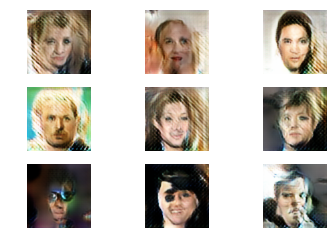

[[0.19626257]
 [0.16162068]
 [0.09720033]
 [0.09753492]
 [0.11757806]
 [0.3052678 ]
 [0.16141224]
 [0.20383161]
 [0.12155873]
 [0.1632674 ]
 [0.03518742]
 [0.38548794]
 [0.06105301]
 [0.13317528]
 [0.14586988]
 [0.14222088]
 [0.09100568]
 [0.05779105]
 [0.08284619]
 [0.16371256]
 [0.11128667]
 [0.09825981]
 [0.20935163]
 [0.21745867]
 [0.11922914]
 [0.06524482]
 [0.060673  ]
 [0.02806324]
 [0.39979106]
 [0.14096346]
 [0.04341996]
 [0.08802959]
 [0.06416225]
 [0.09056792]
 [0.17761272]
 [0.18583894]
 [0.09129384]
 [0.20823815]
 [0.02492893]
 [0.07061884]
 [0.09786209]
 [0.3677842 ]
 [0.11413798]
 [0.23487493]
 [0.21377233]
 [0.1640276 ]
 [0.2463102 ]
 [0.17979467]
 [0.04869568]
 [0.27307093]
 [0.11791629]
 [0.26102865]
 [0.240105  ]
 [0.20192915]
 [0.12987995]
 [0.10114279]
 [0.16906518]
 [0.05781972]
 [0.05537608]
 [0.04825962]
 [0.03687048]
 [0.13870376]
 [0.19491765]
 [0.1005441 ]
 [0.29828733]
 [0.09483925]
 [0.1671719 ]
 [0.20602027]
 [0.18053973]
 [0.02216193]
 [0.09684056]
 [0.09

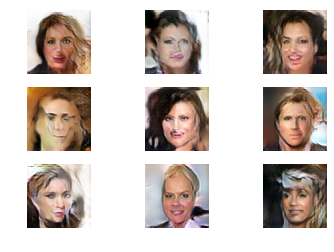

[[0.39745694]
 [0.3771695 ]
 [0.17280746]
 [0.37188545]
 [0.18224347]
 [0.17956126]
 [0.5036096 ]
 [0.25491226]
 [0.3191113 ]
 [0.22214213]
 [0.16482612]
 [0.20936906]
 [0.5202876 ]
 [0.25453556]
 [0.09232187]
 [0.21727148]
 [0.19828412]
 [0.39942878]
 [0.19919413]
 [0.36498   ]
 [0.2594549 ]
 [0.13961977]
 [0.12462234]
 [0.23720655]
 [0.12382698]
 [0.30887786]
 [0.2853585 ]
 [0.20739576]
 [0.44695076]
 [0.5354628 ]
 [0.563883  ]
 [0.5546315 ]
 [0.533698  ]
 [0.2880679 ]
 [0.23831406]
 [0.3262788 ]
 [0.41696334]
 [0.4700238 ]
 [0.6171076 ]
 [0.15217796]
 [0.4825973 ]
 [0.15327963]
 [0.3173956 ]
 [0.2269837 ]
 [0.21401474]
 [0.14842999]
 [0.19915047]
 [0.3282144 ]
 [0.6438834 ]
 [0.22628516]
 [0.30118975]
 [0.30452925]
 [0.32407707]
 [0.1404734 ]
 [0.38109052]
 [0.4261993 ]
 [0.54890084]
 [0.49460885]
 [0.34749645]
 [0.4510327 ]
 [0.2567488 ]
 [0.24363023]
 [0.10411838]
 [0.32619897]
 [0.5001882 ]
 [0.4715653 ]
 [0.5086944 ]
 [0.2475402 ]
 [0.21651235]
 [0.31589544]
 [0.4127141 ]
 [0.23

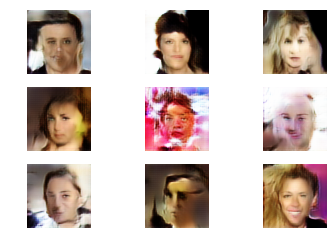

[[0.02635938]
 [0.01250073]
 [0.02462763]
 [0.1883111 ]
 [0.0384635 ]
 [0.01260251]
 [0.01301429]
 [0.00188127]
 [0.10991678]
 [0.13550338]
 [0.0267702 ]
 [0.01000184]
 [0.04558146]
 [0.18283355]
 [0.00729832]
 [0.04754299]
 [0.00151139]
 [0.03912064]
 [0.14320415]
 [0.00601205]
 [0.0241347 ]
 [0.00209373]
 [0.05389106]
 [0.01040071]
 [0.05954319]
 [0.04263949]
 [0.04294831]
 [0.05792439]
 [0.01166806]
 [0.02234009]
 [0.01822066]
 [0.01811451]
 [0.00442374]
 [0.14711037]
 [0.04505259]
 [0.00794947]
 [0.00062478]
 [0.01112008]
 [0.00208586]
 [0.10455573]
 [0.00560495]
 [0.03591701]
 [0.03617015]
 [0.00644049]
 [0.10161075]
 [0.0056482 ]
 [0.07538781]
 [0.0009602 ]
 [0.04384804]
 [0.00214967]
 [0.01112649]
 [0.01656592]
 [0.18804961]
 [0.01579189]
 [0.15078098]
 [0.03046998]
 [0.00518587]
 [0.09754583]
 [0.03121838]
 [0.00530228]
 [0.068432  ]
 [0.05395678]
 [0.00389665]
 [0.00832742]
 [0.03662977]
 [0.05838734]
 [0.03072354]
 [0.02476615]
 [0.10572454]
 [0.00066513]
 [0.04556093]
 [0.00

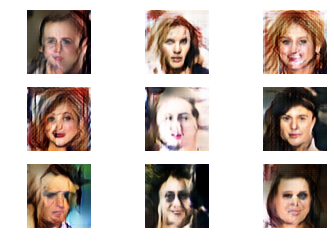

[[0.10819656]
 [0.24466789]
 [0.26719677]
 [0.16058683]
 [0.11333519]
 [0.10337099]
 [0.13724989]
 [0.0579257 ]
 [0.24573949]
 [0.2604177 ]
 [0.17765081]
 [0.20610994]
 [0.13430426]
 [0.04329285]
 [0.14849749]
 [0.09692258]
 [0.30805486]
 [0.08012205]
 [0.20028889]
 [0.01419565]
 [0.22394869]
 [0.13572332]
 [0.11049208]
 [0.13433832]
 [0.02127805]
 [0.30440065]
 [0.074242  ]
 [0.063418  ]
 [0.07577747]
 [0.02904204]
 [0.14519489]
 [0.01299655]
 [0.07803118]
 [0.05828732]
 [0.14644462]
 [0.02036026]
 [0.12224999]
 [0.16892117]
 [0.06685495]
 [0.01290038]
 [0.08371526]
 [0.11173958]
 [0.1086776 ]
 [0.11845282]
 [0.13586453]
 [0.21925563]
 [0.04116294]
 [0.0716787 ]
 [0.1926705 ]
 [0.12494993]
 [0.23326164]
 [0.05012807]
 [0.2822682 ]
 [0.08239713]
 [0.06100041]
 [0.27547187]
 [0.20990473]
 [0.1962964 ]
 [0.07165462]
 [0.07141292]
 [0.08655348]
 [0.08089766]
 [0.0836536 ]
 [0.10924822]
 [0.15680191]
 [0.01685846]
 [0.31419075]
 [0.0694845 ]
 [0.1991784 ]
 [0.15109795]
 [0.0686889 ]
 [0.23

KeyboardInterrupt: 

In [110]:
N_EPOCHS = 60
for epoch in range(N_EPOCHS):

  cum_d_loss = 0.
  cum_g_loss = 0.
  
  for batch_idx in range(num_batches):
    # Get the next set of real images to be used in this iteration
    images = X_train[batch_idx*BATCH_SIZE : (batch_idx+1)*BATCH_SIZE]

    noise_data = generate_noise(BATCH_SIZE, 100)
    generated_images = generator.predict(noise_data)

    # Train on soft labels (add noise to labels as well)
    noise_prop = 0.05 # Randomly flip 5% of labels
    
    # Prepare labels for real data
    true_labels = np.zeros((BATCH_SIZE, 1)) + np.random.uniform(low=0.0, high=0.1, size=(BATCH_SIZE, 1))
    flipped_idx = np.random.choice(np.arange(len(true_labels)), size=int(noise_prop*len(true_labels)))
    true_labels[flipped_idx] = 1 - true_labels[flipped_idx]
    
    # Train discriminator on real data
    d_loss_true = discriminator.train_on_batch(images, true_labels)

    # Prepare labels for generated data
    gene_labels = np.ones((BATCH_SIZE, 1)) - np.random.uniform(low=0.0, high=0.1, size=(BATCH_SIZE, 1))
    flipped_idx = np.random.choice(np.arange(len(gene_labels)), size=int(noise_prop*len(gene_labels)))
    gene_labels[flipped_idx] = 1 - gene_labels[flipped_idx]
    
    # Train discriminator on generated data
    d_loss_gene = discriminator.train_on_batch(generated_images, gene_labels)

    d_loss = 0.5 * np.add(d_loss_true, d_loss_gene)
    cum_d_loss += d_loss
    # Train generator
    noise_data = generate_noise(BATCH_SIZE, 100)
    g_loss = gan.train_on_batch(noise_data, np.zeros((BATCH_SIZE, 1)))
    cum_g_loss += g_loss
    
  noise_data = generate_noise(BATCH_SIZE, 100)
  generated_images = generator.predict(noise_data)
  print('  Epoch: {}, Generator Loss: {}, Discriminator Loss: {}'.format(epoch+1, cum_g_loss/num_batches, cum_d_loss/num_batches))
  show_imgs("epoch" + str(epoch))
  print(discriminator.predict(generated_images))
